### Import Libraries

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
#import researchpy as rp 
# can't use researchpy since it's not a module here
import scipy.stats as stats
from scipy.stats import norm
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
from numpy.polynomial import Polynomial as P

### Read Data

In [3]:
EngNightData0 = pd.read_csv('EnginFriNight.csv')
EngNoonData0 = pd.read_csv('EnginLibNoon.csv')
EtchNightData0 = pd.read_csv('EtchFriNight.csv')
EtchNoonData0 = pd.read_csv('EtchFri.csv')
HearstNightData0 = pd.read_csv('HearstFriNight.csv')
HearstNoonData0 = pd.read_csv('HearstNoon.csv')
MoffittNightData0 = pd.read_csv('MoffittFriNight.csv')
MoffittNoonData0 = pd.read_csv('MoffittNoon.csv')

### Mutate Data

In [4]:
EngNightData = EngNightData0.drop(EngNightData0['Counts within Interval'].idxmax())
EngNoonData = EngNoonData0.drop(EngNoonData0['Counts within Interval'].idxmax())
EtchNightData = EtchNightData0.drop(EtchNightData0['Counts within Interval'].idxmax())
EtchNoonData = EtchNoonData0.drop(EtchNoonData0['Counts within Interval'].idxmax())
HearstNightData = HearstNightData0.drop(HearstNightData0['Counts within Interval'].idxmax())
HearstNoonData = HearstNoonData0.drop(HearstNoonData0['Counts within Interval'].idxmax())
MoffittNightData = MoffittNightData0.drop(MoffittNightData0['Counts within Interval'].idxmax())
MoffittNoonData = MoffittNoonData0.drop(MoffittNoonData0['Counts within Interval'].idxmax())

### Print Data

In [5]:
EngNightData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639162e+09,15.097266,1012.370649,40.313798,0,0,0,0,0.0
1,1.639162e+09,15.122852,1012.407977,40.313753,0,0,0,0,0.0
2,1.639162e+09,15.138281,1012.378402,40.241664,0,0,0,0,0.0
3,1.639162e+09,15.164062,1012.420082,40.169518,0,0,0,1,12.0
4,1.639162e+09,15.179492,1012.405994,40.163499,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639163e+09,13.426953,1012.854735,43.605425,0,0,0,0,0.0
114,1.639163e+09,13.385938,1012.888483,43.748593,0,0,0,0,0.0
115,1.639163e+09,13.411523,1012.855632,43.898051,0,0,0,0,0.0
116,1.639163e+09,13.432227,1012.866961,43.898121,0,0,0,0,0.0


In [6]:
EngNoonData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639169e+09,15.343945,1011.964217,43.598320,3,5,7,0,0.0
1,1.639169e+09,15.405469,1011.926216,43.484601,3,5,7,0,0.0
2,1.639169e+09,15.436328,1011.812480,43.268618,3,5,7,1,12.0
3,1.639169e+09,15.508398,1011.939238,43.142775,3,5,7,0,0.0
4,1.639169e+09,15.569922,1012.002058,42.980867,3,5,7,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639170e+09,18.725391,1011.641296,38.522657,3,5,7,0,0.0
114,1.639170e+09,18.709961,1011.499532,37.947187,3,5,7,0,0.0
115,1.639170e+09,18.725391,1011.348339,37.910741,3,5,7,0,0.0
116,1.639170e+09,18.725391,1011.086970,38.455936,3,5,7,0,0.0


In [7]:
EtchNightData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639161e+09,17.923828,1011.970535,34.329350,0,0,0,0,0.0
2,1.639161e+09,17.954492,1011.963816,34.098910,0,0,0,0,0.0
3,1.639161e+09,18.000781,1011.943845,33.988999,0,0,0,0,0.0
4,1.639161e+09,17.969922,1011.959632,33.922933,0,0,0,0,0.0
5,1.639161e+09,18.036719,1011.911908,34.000567,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639161e+09,15.909180,1012.050248,38.000875,0,0,0,0,0.0
114,1.639161e+09,15.878320,1012.087427,38.193787,0,0,0,0,0.0
115,1.639161e+09,15.842383,1012.054787,38.085588,0,0,0,0,0.0
116,1.639161e+09,15.847461,1012.078013,37.904958,0,0,0,1,12.0


In [8]:
EtchNoonData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639160e+09,19.249609,1010.813316,24.215981,0,0,0,0,0.0
1,1.639160e+09,19.290820,1010.841058,24.245607,0,0,0,0,0.0
2,1.639160e+09,19.249609,1010.818919,24.186152,0,0,0,0,0.0
4,1.639160e+09,19.244531,1010.840612,24.089740,0,0,0,0,0.0
5,1.639160e+09,19.229102,1010.842744,24.059287,0,0,0,1,12.0
...,...,...,...,...,...,...,...,...,...
113,1.639160e+09,18.288672,1011.264350,26.861897,0,0,0,0,0.0
114,1.639160e+09,18.293750,1011.313282,27.268913,0,0,0,2,24.0
115,1.639160e+09,18.278320,1011.374336,27.566595,0,0,0,0,0.0
116,1.639160e+09,18.324609,1011.513620,27.662240,0,0,0,0,0.0


In [9]:
HearstNightData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639163e+09,14.295508,1012.494478,41.567923,0,0,0,0,0.0
1,1.639163e+09,14.331445,1012.478192,41.591903,0,0,0,0,0.0
2,1.639163e+09,14.346875,1012.520757,41.621894,0,0,0,0,0.0
3,1.639163e+09,14.346875,1012.508148,41.669846,0,0,0,0,0.0
4,1.639163e+09,14.351953,1012.467347,41.627898,0,0,0,1,12.0
...,...,...,...,...,...,...,...,...,...
113,1.639163e+09,15.549414,1012.422098,38.923879,0,0,0,0,0.0
114,1.639163e+09,15.575195,1012.427804,38.893695,0,0,0,0,0.0
115,1.639163e+09,15.600781,1012.432673,38.917695,0,0,0,0,0.0
116,1.639163e+09,15.616211,1012.423156,38.731033,0,0,0,1,12.0


In [10]:
HearstNoonData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639169e+09,17.625586,1011.318308,38.820983,7168,512,1024,1,12.0
2,1.639169e+09,17.872266,1011.338240,38.244869,7168,512,1024,1,12.0
3,1.639169e+09,17.975195,1011.322467,37.778340,7168,512,1024,0,0.0
4,1.639169e+09,18.067578,1011.278361,37.729187,7168,512,1024,0,0.0
5,1.639169e+09,18.155078,1011.340800,37.425740,7168,512,1024,2,24.0
...,...,...,...,...,...,...,...,...,...
113,1.639169e+09,15.539258,1011.165017,43.154936,7168,512,1024,0,0.0
114,1.639169e+09,15.513477,1011.148710,43.028683,7168,512,1024,0,0.0
115,1.639169e+09,15.533984,1011.144946,43.377087,7168,512,1024,0,0.0
116,1.639169e+09,15.564844,1011.120958,43.533436,7168,512,1024,0,0.0


In [11]:
MoffittNightData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639164e+09,14.788867,1014.782305,38.753871,0,0,0,0,0.0
1,1.639164e+09,14.804297,1014.799045,38.765735,0,0,0,0,0.0
2,1.639164e+09,14.799219,1014.775144,38.597743,0,0,0,0,0.0
4,1.639164e+09,14.809375,1014.778319,38.639711,0,0,0,0,0.0
5,1.639164e+09,14.788867,1014.711397,38.567724,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639165e+09,14.429102,1014.664468,40.369093,0,0,0,0,0.0
114,1.639165e+09,14.434180,1014.662804,40.500985,0,0,0,0,0.0
115,1.639165e+09,14.454883,1014.617563,40.297064,0,0,0,0,0.0
116,1.639165e+09,14.470313,1014.647766,40.063190,0,0,0,0,0.0


In [12]:
MoffittNoonData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639171e+09,16.993555,1012.947821,41.014551,2560,1792,0,0,0.0
2,1.639171e+09,17.029492,1012.898403,40.604406,2560,1792,0,1,12.0
3,1.639171e+09,17.050000,1012.914332,40.435502,2560,1792,0,1,12.0
4,1.639171e+09,17.039844,1012.918803,40.332992,2560,1792,0,0,0.0
5,1.639171e+09,17.024414,1012.900464,40.706956,2560,1792,0,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639171e+09,16.160937,1013.275306,39.998272,2560,1792,0,0,0.0
114,1.639171e+09,16.119922,1013.272287,39.793696,2560,1792,0,1,12.0
115,1.639171e+09,16.109570,1013.269436,39.209825,2560,1792,0,0,0.0
116,1.639171e+09,16.135352,1013.223021,38.571192,2560,1792,0,0,0.0


### Plot Radiation Data for Both Noon and Night Times at Each Location to See if Consistent

#### Engineering Library

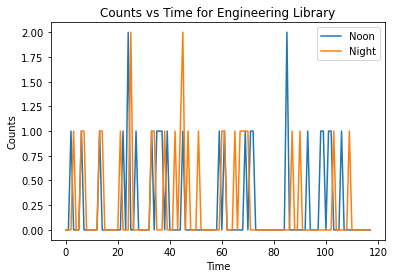

<Figure size 1080x1080 with 0 Axes>

In [13]:
plt.plot(EngNoonData["Counts within Interval"],label = "Noon")
plt.plot(EngNightData["Counts within Interval"],label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Time')
plt.legend()                  
plt.title("Counts vs Time for Engineering Library")    
plt.figure(figsize=(15, 15))
plt.show()
plt.rcParams['figure.figsize'] = [10,7]

#### Etcheverry Hall

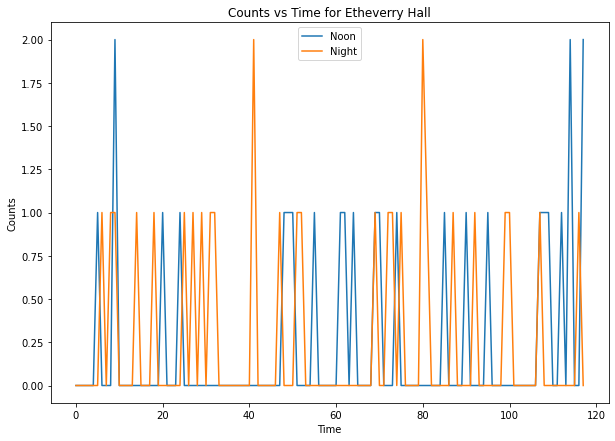

In [14]:
plt.plot(EtchNoonData["Counts within Interval"],label = "Noon")
plt.plot(EtchNightData["Counts within Interval"],label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Time')
plt.legend()                  
plt.title("Counts vs Time for Etheverry Hall")  
display.display(plt.gcf())
display.clear_output(wait=True)
plt.show()
plt.rcParams['figure.figsize'] = [10,7]

##### Hearst Mining Building

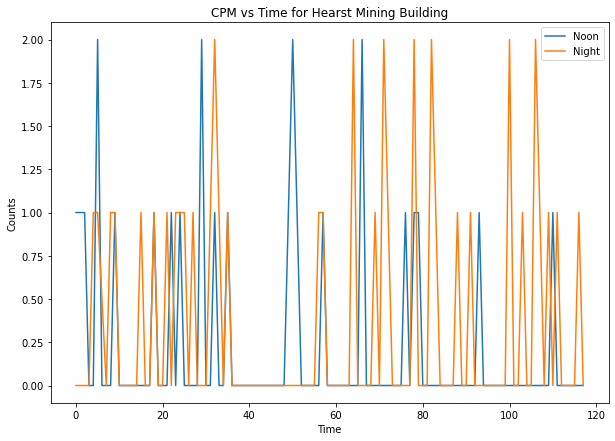

In [15]:
plt.plot(HearstNoonData["Counts within Interval"],label = "Noon")
plt.plot(HearstNightData["Counts within Interval"],label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Time')
plt.legend()                  
plt.title("CPM vs Time for Hearst Mining Building")  
display.display(plt.gcf())
display.clear_output(wait=True)
plt.show()
plt.rcParams['figure.figsize'] = [10,7]

#### Moffitt Library

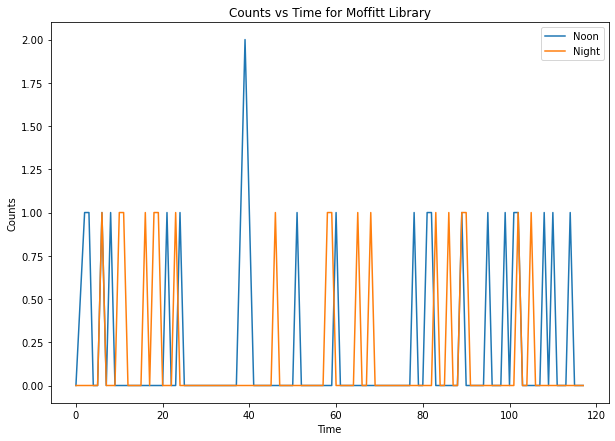

In [16]:
plt.plot(MoffittNoonData["Counts within Interval"],label = "Noon")
plt.plot(MoffittNightData["Counts within Interval"],label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Time')
plt.legend()                  
plt.title("Counts vs Time for Moffitt Library") 
display.display(plt.gcf())
display.clear_output(wait=True)
plt.show()
plt.rcParams['figure.figsize'] = [10,7]

#### All Buildings

In [17]:
mean_eng_noon = np.mean(EngNoonData["Counts within Interval"])
mean_etch_noon = np.mean(EtchNoonData["Counts within Interval"])
mean_hearst_noon = np.mean(HearstNoonData["Counts within Interval"])
mean_moffitt_noon = np.mean(MoffittNoonData["Counts within Interval"])
mean_eng_night = np.mean(EngNightData["Counts within Interval"])
mean_etch_night = np.mean(EtchNightData["Counts within Interval"])
mean_hearst_night = np.mean(HearstNightData["Counts within Interval"])
mean_moffitt_night = np.mean(MoffittNightData["Counts within Interval"])

means_noon = [mean_eng_noon,mean_etch_noon,mean_hearst_noon,mean_moffitt_noon]
means_night = [mean_eng_night,mean_etch_night,mean_hearst_night,mean_moffitt_night]

print('The mean number of counts detected at the Engineering library was ' + str(mean_eng_noon) + " and " + str(mean_eng_night) + " counts at noon and night time, respectively.")
print('The mean number of counts detected at Etcheverry Hall was ' + str(mean_etch_noon) + " and " + str(mean_etch_night) + " counts at noon and night time, respectively.")
print('The mean number of counts detected at the Hearst Mining Building was ' + str(mean_hearst_noon) + " and " + str(mean_hearst_night) + " counts at noon and night time, respectively.")
print('The mean number of counts detected at Moffitt library was ' + str(mean_moffitt_noon) + " and " + str(mean_moffitt_night) + " counts at noon and night time, respectively.")

The mean number of counts detected at the Engineering library was 0.2222222222222222 and 0.23076923076923078 counts at noon and night time, respectively.
The mean number of counts detected at Etcheverry Hall was 0.2222222222222222 and 0.23931623931623933 counts at noon and night time, respectively.
The mean number of counts detected at the Hearst Mining Building was 0.20512820512820512 and 0.3418803418803419 counts at noon and night time, respectively.
The mean number of counts detected at Moffitt library was 0.19658119658119658 and 0.15384615384615385 counts at noon and night time, respectively.


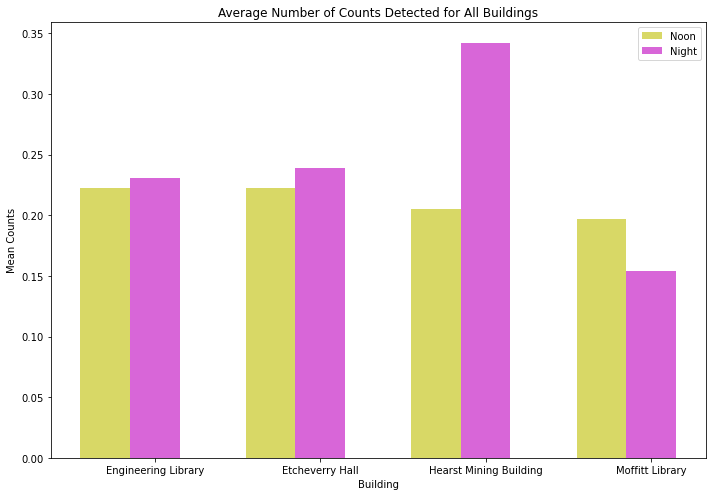

In [18]:
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.3
opacity = 0.6

rects1 = plt.bar(index, means_noon, bar_width,
alpha=opacity,
color='y',
label='Noon')

rects2 = plt.bar(index + bar_width, means_night, bar_width,
alpha=opacity,
color='m',
label='Night')

plt.xlabel('Building')
plt.ylabel('Mean Counts')
plt.title('Average Number of Counts Detected for All Buildings')
plt.xticks(index + bar_width, ('Engineering Library', 'Etcheverry Hall', 'Hearst Mining Building', 'Moffitt Library'))
plt.legend()

plt.tight_layout()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

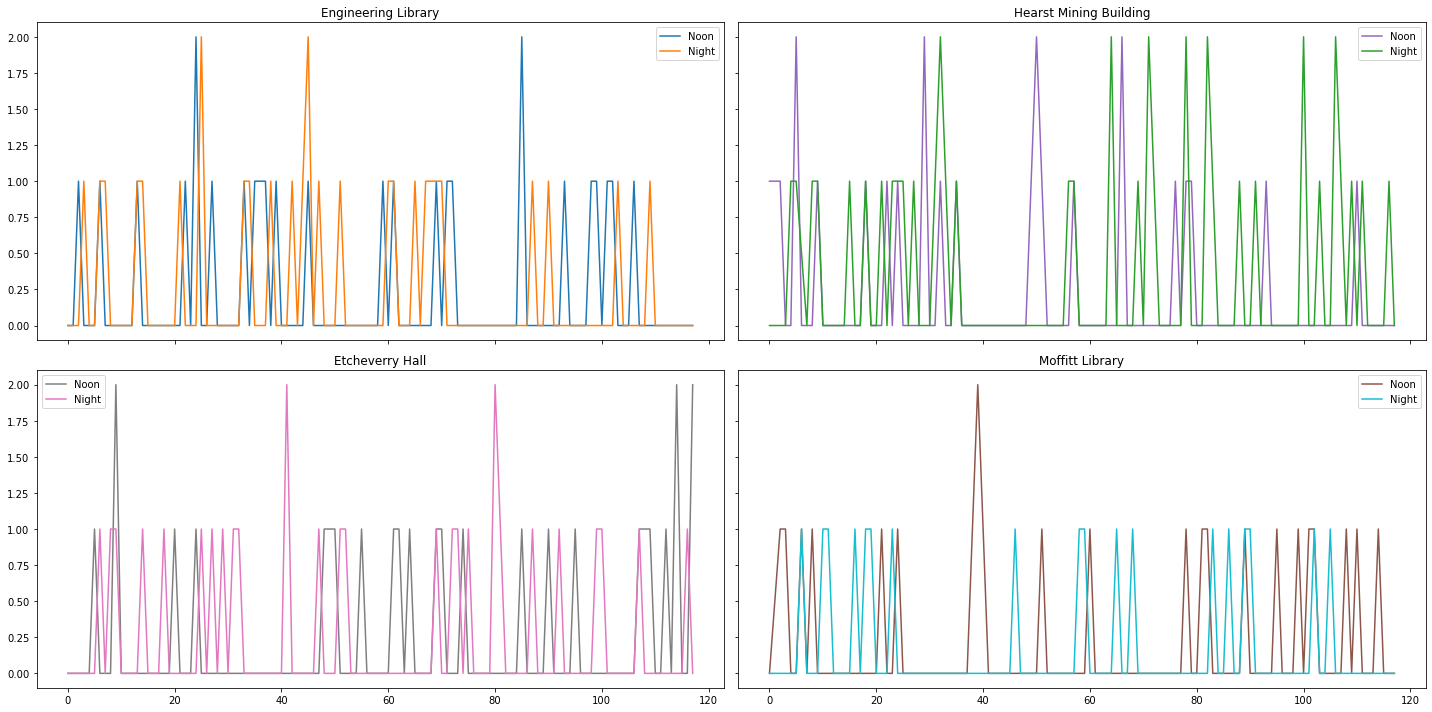

In [19]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].plot(EngNoonData["Counts within Interval"], label = 'Noon')
axs[0, 0].plot(EngNightData["Counts within Interval"], label = 'Night')
axs[0, 0].legend()
axs[0, 0].set_title("Engineering Library")
axs[1, 0].plot(EtchNoonData["Counts within Interval"], 'tab:gray', label = 'Noon')
axs[1, 0].plot(EtchNightData["Counts within Interval"], 'tab:pink', label = 'Night')
axs[1, 0].legend()
axs[1, 0].set_title("Etcheverry Hall") 
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(HearstNoonData["Counts within Interval"], 'tab:purple', label = 'Noon')
axs[0, 1].plot(HearstNightData["Counts within Interval"], 'tab:green', label = 'Night')
axs[0, 1].legend()
axs[0, 1].set_title("Hearst Mining Building")
axs[1, 1].plot(MoffittNoonData["Counts within Interval"], 'tab:brown', label = 'Noon')
axs[1, 1].plot(MoffittNightData["Counts within Interval"], 'tab:cyan', label = 'Night')
axs[1, 1].legend()
axs[1, 1].set_title("Moffitt Library") 
fig.tight_layout()
plt.rcParams['figure.figsize'] = [20, 10]

#### All at Noon

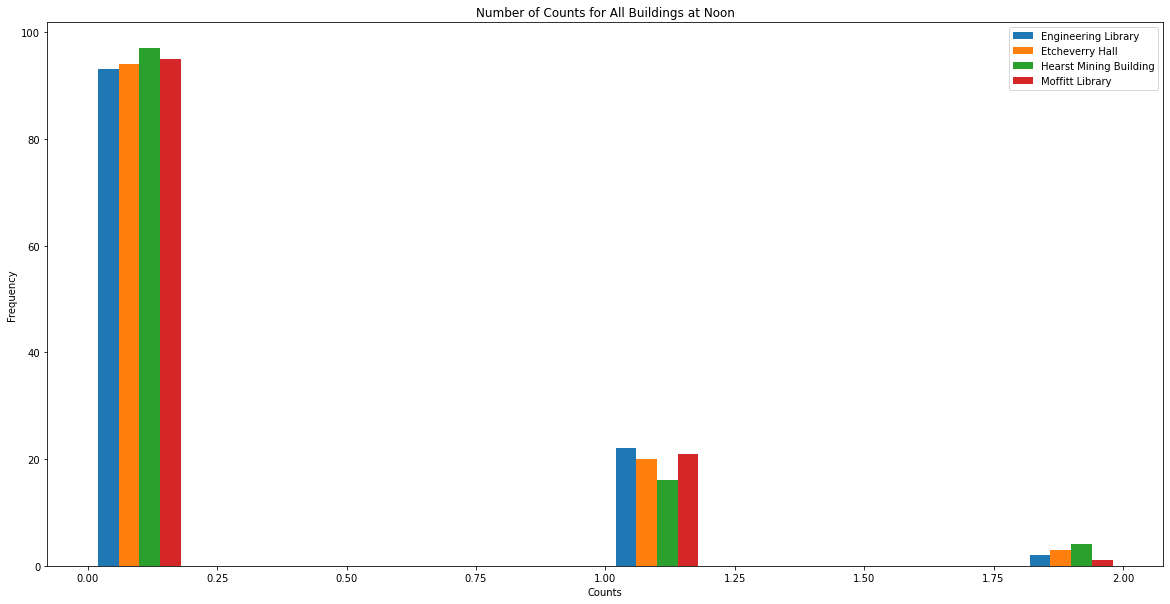

In [20]:
plt.hist([EngNoonData["Counts within Interval"],EtchNoonData["Counts within Interval"],HearstNoonData["Counts within Interval"],MoffittNoonData["Counts within Interval"]],label = ["Engineering Library","Etcheverry Hall","Hearst Mining Building","Moffitt Library"])
plt.ylabel('Frequency') 
plt.xlabel('Counts')
plt.legend()                  
plt.title("Number of Counts for All Buildings at Noon")
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

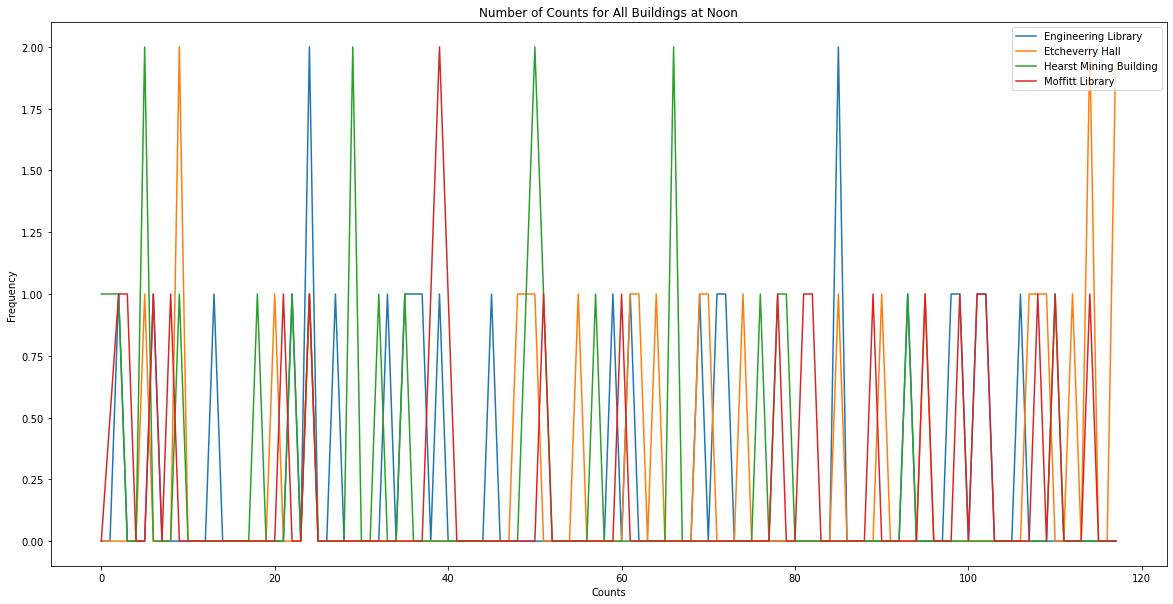

In [21]:
plt.plot(EngNoonData["Counts within Interval"],label = "Engineering Library")
plt.plot(EtchNoonData["Counts within Interval"],label = "Etcheverry Hall")
plt.plot(HearstNoonData["Counts within Interval"],label = "Hearst Mining Building")
plt.plot(MoffittNoonData["Counts within Interval"],label = "Moffitt Library")
plt.ylabel('Frequency') 
plt.xlabel('Counts')
plt.legend()                  
plt.title("Number of Counts for All Buildings at Noon") 
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

#### All at Night

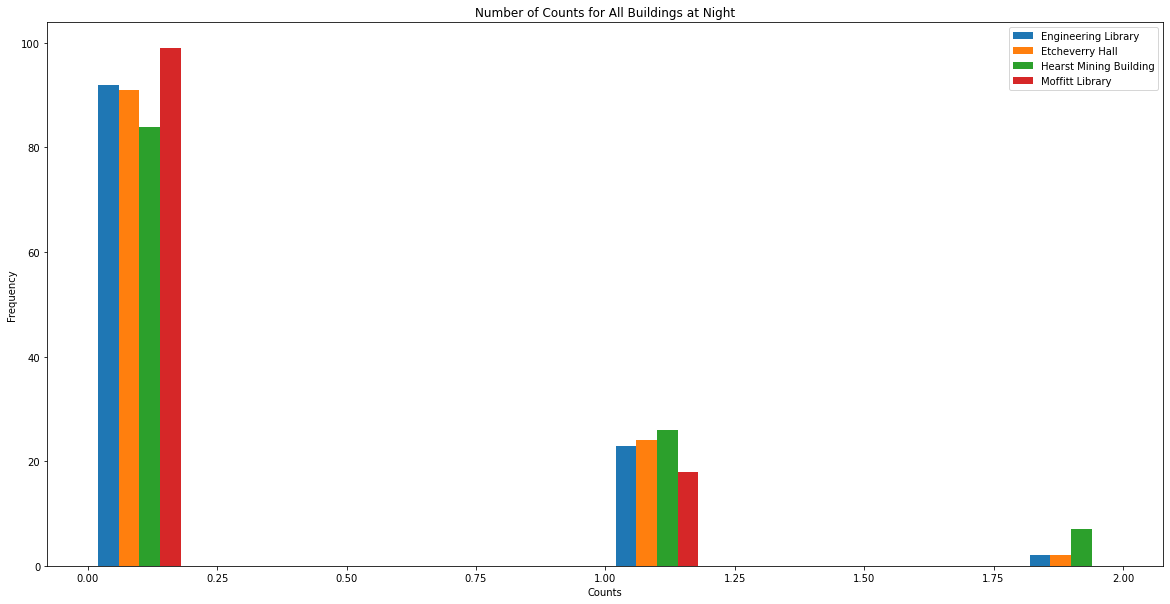

In [22]:
plt.hist([EngNightData["Counts within Interval"],EtchNightData["Counts within Interval"],HearstNightData["Counts within Interval"],MoffittNightData["Counts within Interval"]],label = ["Engineering Library","Etcheverry Hall","Hearst Mining Building","Moffitt Library"])
plt.ylabel('Frequency') 
plt.xlabel('Counts')
plt.legend()                  
plt.title("Number of Counts for All Buildings at Night")
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

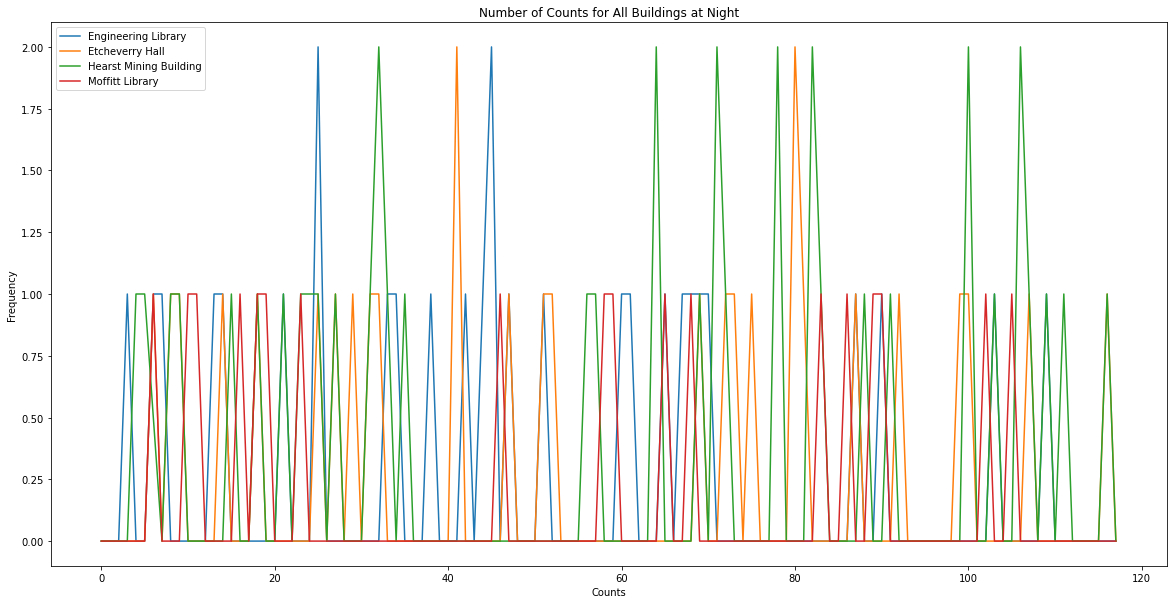

In [23]:
plt.plot(EngNightData["Counts within Interval"],label = "Engineering Library")
plt.plot(EtchNightData["Counts within Interval"],label = "Etcheverry Hall")
plt.plot(HearstNightData["Counts within Interval"],label = "Hearst Mining Building")
plt.plot(MoffittNightData["Counts within Interval"],label = "Moffitt Library")
plt.ylabel('Frequency') 
plt.xlabel('Counts')
plt.legend()                  
plt.title("Number of Counts for All Buildings at Night")   
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

### Plot Radiation vs Temperature Data for Both Noon and Night Times at Each Location

#### Engineering Library

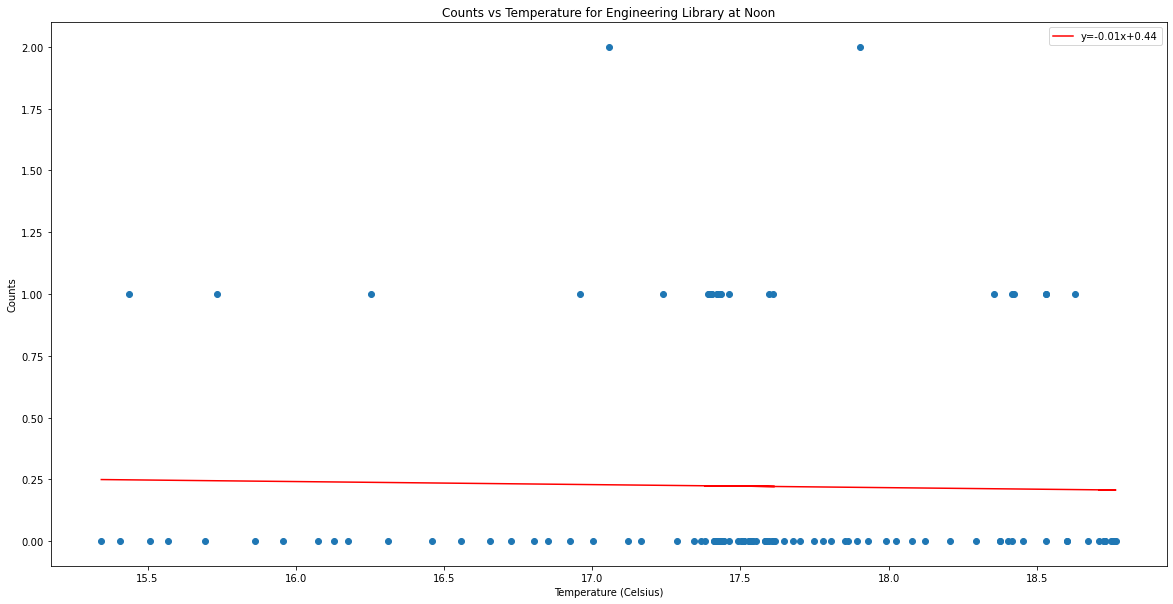

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.05837
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.810
Time:                            13:44:31   Log-Likelihood:                -73.854
No. Observations:                     117   AIC:                             151.7
Df Residuals:                         115   BIC:                             157.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [24]:
x = EngNoonData["Temperature"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNoonData["Temperature"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

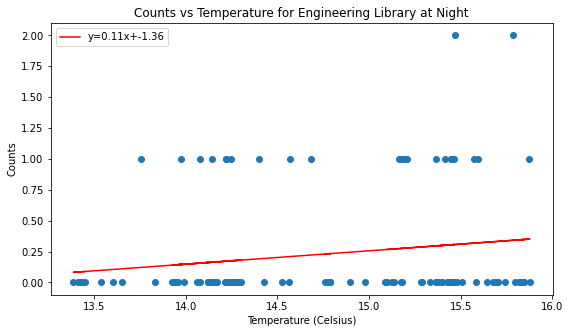

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.028
Model:                                OLS   Adj. R-squared:                  0.020
Method:                     Least Squares   F-statistic:                     3.365
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):             0.0692
Time:                            13:44:31   Log-Likelihood:                -73.503
No. Observations:                     117   AIC:                             151.0
Df Residuals:                         115   BIC:                             156.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [25]:
x = EngNightData["Temperature"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNightData["Temperature"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')              
plt.title("Counts vs Temperature for Engineering Library at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

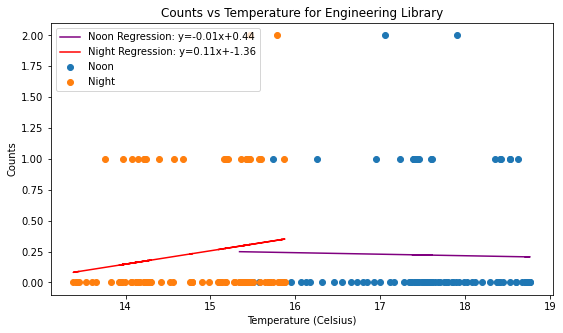

In [26]:
x = EngNoonData["Temperature"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EngNightData["Temperature"]
r = EngNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EngNoonData["Temperature"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["Temperature"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for Engineering Library")  
plt.rcParams['figure.figsize'] = [9,5]
plt.legend()
plt.show()

#x1 = list(x)
#q1 = list(q)
#x_comb = []
#x_comb.append(x1)
#x_comb.append(q1)

#y1 = list(y)
#r1 = list(r)
#y_comb = []
#y_comb.append(y1)
#y_comb.append(r1)
#X = sm.add_constant(x_comb)
#res = sm.OLS(y_comb, X).fit()
#print(res.summary())
#print(x_comb)
#print(y_comb)

#### Etheverry Hall

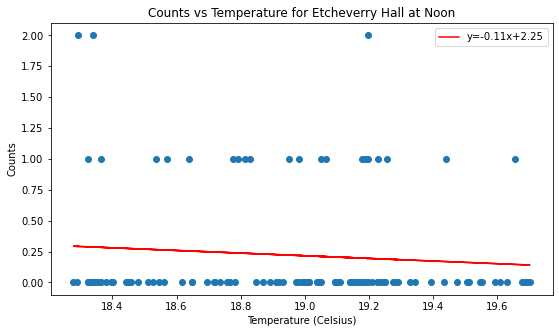

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.008
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.9466
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.333
Time:                            13:44:32   Log-Likelihood:                -78.046
No. Observations:                     117   AIC:                             160.1
Df Residuals:                         115   BIC:                             165.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [27]:
x = EtchNoonData["Temperature"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNoonData["Temperature"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Etcheverry Hall at Noon")          
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

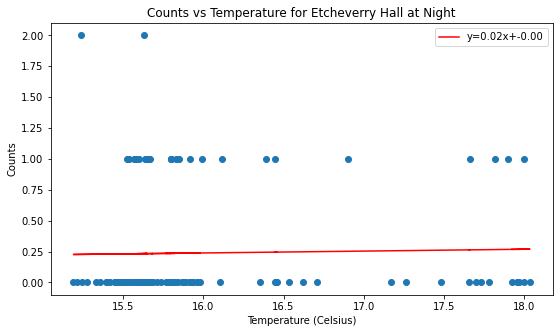

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.07393
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.786
Time:                            13:44:32   Log-Likelihood:                -76.391
No. Observations:                     117   AIC:                             156.8
Df Residuals:                         115   BIC:                             162.3
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [28]:
x = EtchNightData["Temperature"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNightData["Temperature"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')              
plt.title("Counts vs Temperature for Etcheverry Hall at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

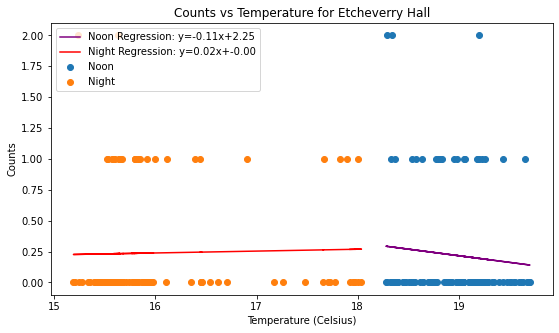

In [29]:
x = EtchNoonData["Temperature"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EtchNightData["Temperature"]
r = EtchNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EtchNoonData["Temperature"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["Temperature"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Hearst Mining Building

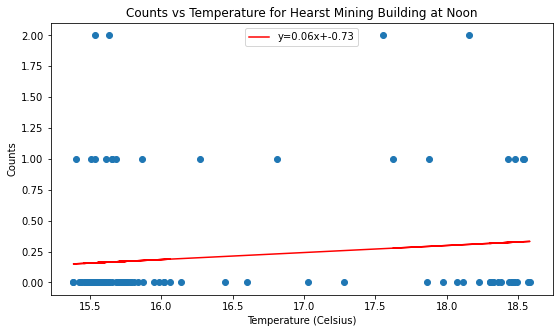

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.019
Model:                                OLS   Adj. R-squared:                  0.010
Method:                     Least Squares   F-statistic:                     2.178
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.143
Time:                            13:44:33   Log-Likelihood:                -79.304
No. Observations:                     117   AIC:                             162.6
Df Residuals:                         115   BIC:                             168.1
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [30]:
x = HearstNoonData["Temperature"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNoonData["Temperature"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

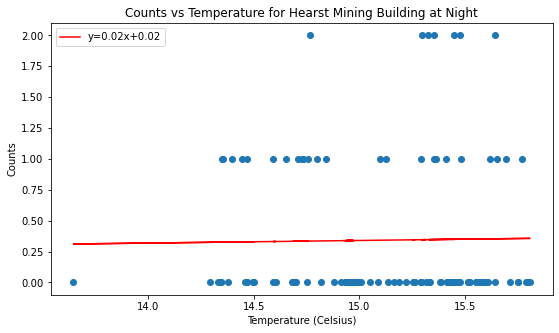

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.02842
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.866
Time:                            13:44:34   Log-Likelihood:                -103.69
No. Observations:                     117   AIC:                             211.4
Df Residuals:                         115   BIC:                             216.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [31]:
x = HearstNightData["Temperature"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNightData["Temperature"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

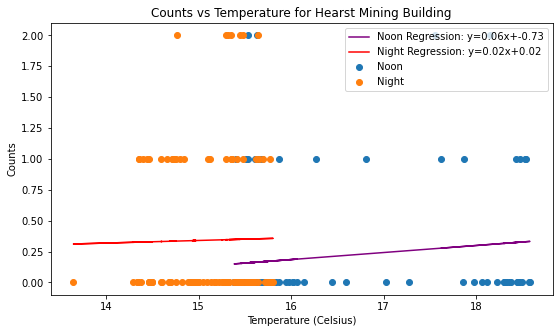

In [32]:
x = HearstNoonData["Temperature"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = HearstNightData["Temperature"]
r = HearstNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(HearstNoonData["Temperature"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["Temperature"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

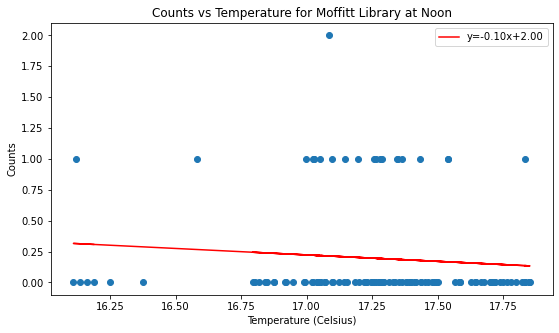

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.010
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     1.111
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.294
Time:                            13:44:34   Log-Likelihood:                -63.500
No. Observations:                     117   AIC:                             131.0
Df Residuals:                         115   BIC:                             136.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [33]:
x = MoffittNoonData["Temperature"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNoonData["Temperature"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

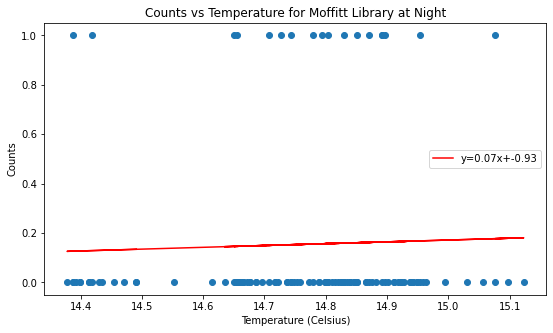

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.007
Method:                     Least Squares   F-statistic:                    0.1522
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.697
Time:                            13:44:35   Log-Likelihood:                -46.665
No. Observations:                     117   AIC:                             97.33
Df Residuals:                         115   BIC:                             102.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [34]:
x = MoffittNightData["Temperature"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNightData["Temperature"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

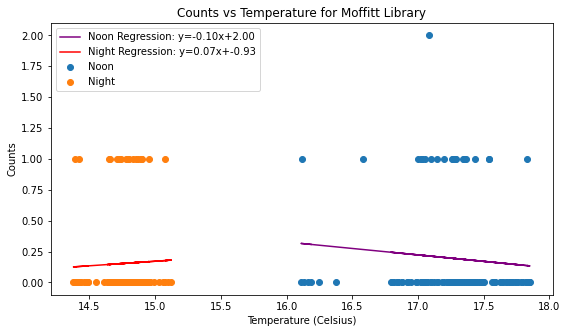

In [35]:
x = MoffittNoonData["Temperature"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = MoffittNightData["Temperature"]
r = MoffittNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(MoffittNoonData["Temperature"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["Temperature"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### All Buildings at Noon

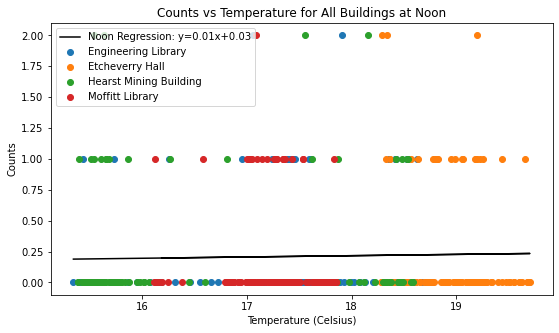

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3518
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.553
Time:                        13:44:36   Log-Likelihood:                -298.17
No. Observations:                 468   AIC:                             600.3
Df Residuals:                     466   BIC:                             608.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0285      0.309      0.092      0.9

In [36]:
x = []
x.extend(EngNoonData["Temperature"])
x.extend(EtchNoonData["Temperature"])
x.extend(HearstNoonData["Temperature"])
x.extend(MoffittNoonData["Temperature"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["Temperature"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["Temperature"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["Temperature"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["Temperature"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

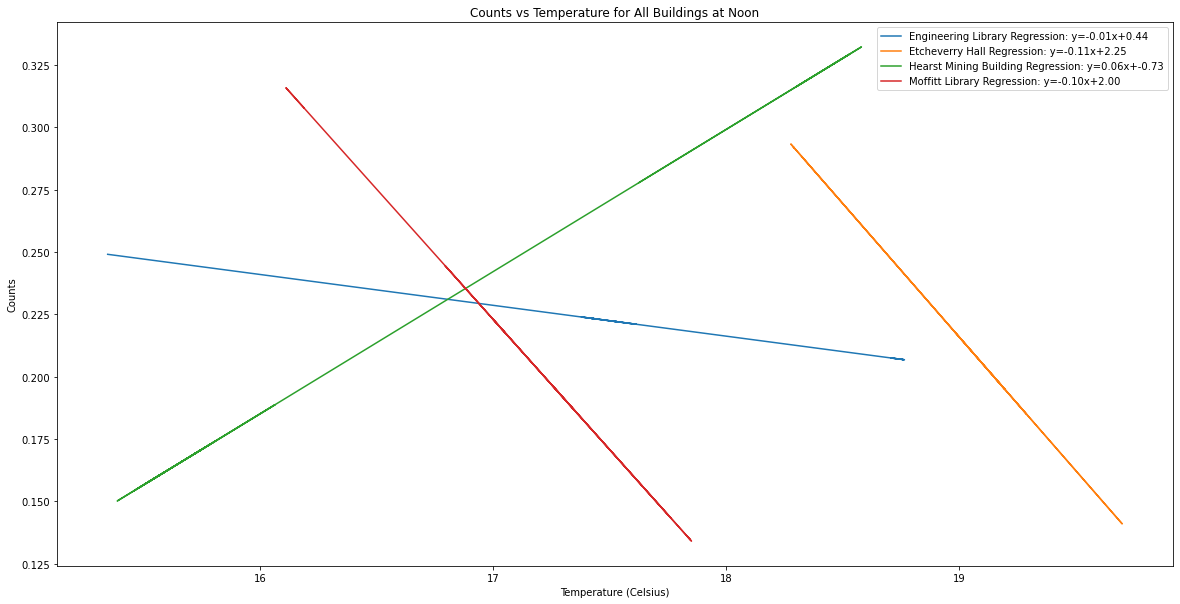

In [37]:
x = EngNoonData["Temperature"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNoonData["Temperature"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNoonData["Temperature"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNoonData["Temperature"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

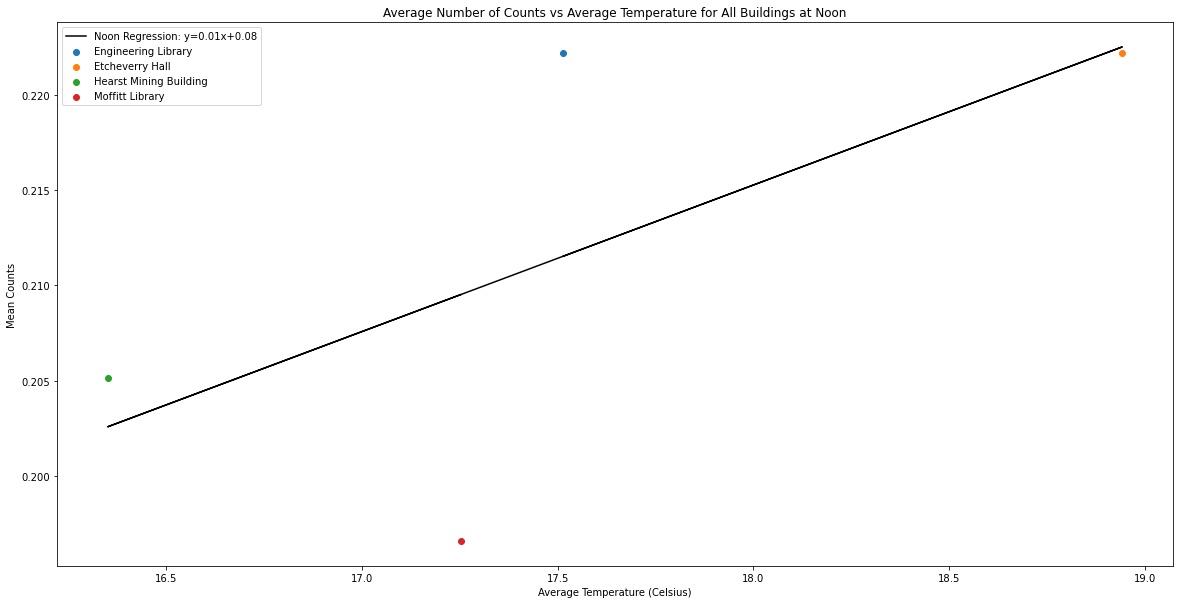

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     1.422
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.355
Time:                        13:44:37   Log-Likelihood:                 13.401
No. Observations:                   4   AIC:                            -22.80
Df Residuals:                       2   BIC:                            -24.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0768      0.113      0.679      0.5

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [38]:
x = [np.mean(EngNoonData["Temperature"]), np.mean(EtchNoonData["Temperature"]), np.mean(HearstNoonData["Temperature"]), np.mean(MoffittNoonData["Temperature"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["Temperature"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["Temperature"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["Temperature"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["Temperature"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Temperature (Celsius)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Temperature for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

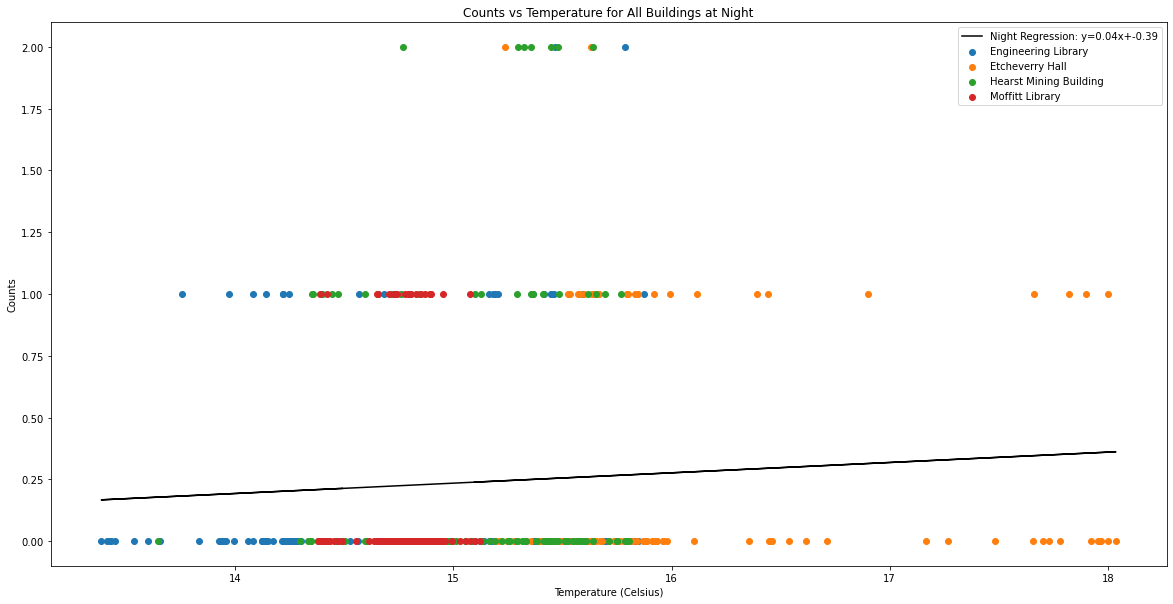

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.182
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.140
Time:                        13:44:38   Log-Likelihood:                -319.23
No. Observations:                 468   AIC:                             642.5
Df Residuals:                     466   BIC:                             650.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3928      0.430     -0.914      0.3

In [39]:
x = []
x.extend(EngNightData["Temperature"])
x.extend(EtchNightData["Temperature"])
x.extend(HearstNightData["Temperature"])
x.extend(MoffittNightData["Temperature"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["Temperature"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["Temperature"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["Temperature"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["Temperature"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

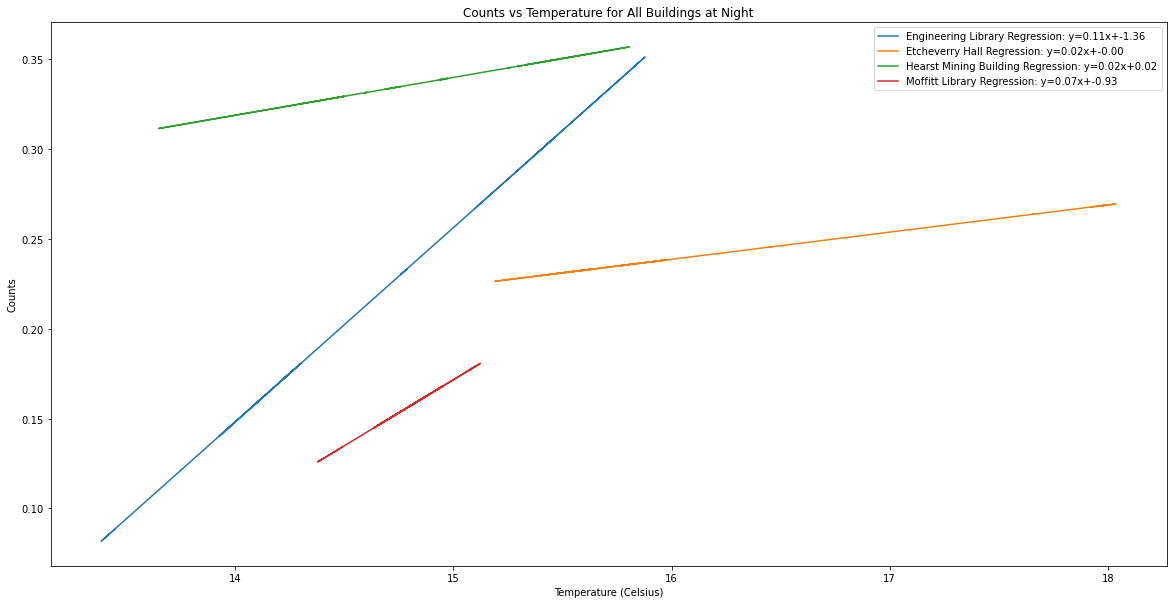

In [40]:
x = EngNightData["Temperature"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNightData["Temperature"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNightData["Temperature"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNightData["Temperature"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

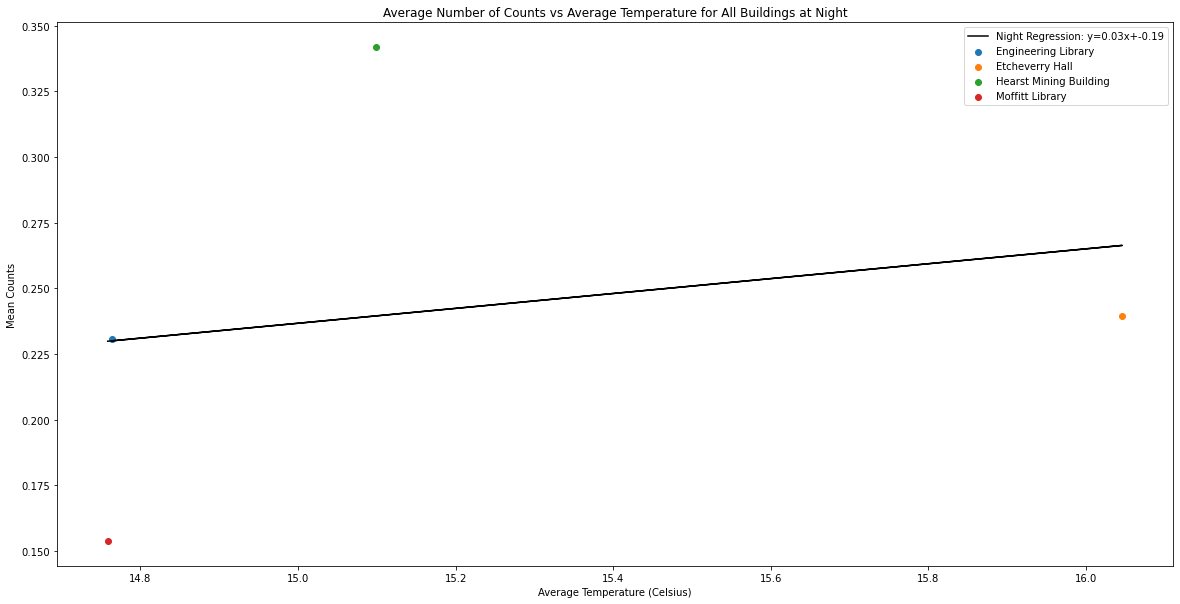

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.426
Method:                 Least Squares   F-statistic:                    0.1044
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.777
Time:                        13:44:38   Log-Likelihood:                 5.2469
No. Observations:                   4   AIC:                            -6.494
Df Residuals:                       2   BIC:                            -7.721
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1881      1.330     -0.141      0.9

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [41]:
x = [np.mean(EngNightData["Temperature"]), np.mean(EtchNightData["Temperature"]), np.mean(HearstNightData["Temperature"]), np.mean(MoffittNightData["Temperature"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["Temperature"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["Temperature"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["Temperature"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["Temperature"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Temperature (Celsius)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Temperature for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

### Plot Radiation vs Humidity Data for Both Noon and Night Times at Each Location

#### Engineering Library

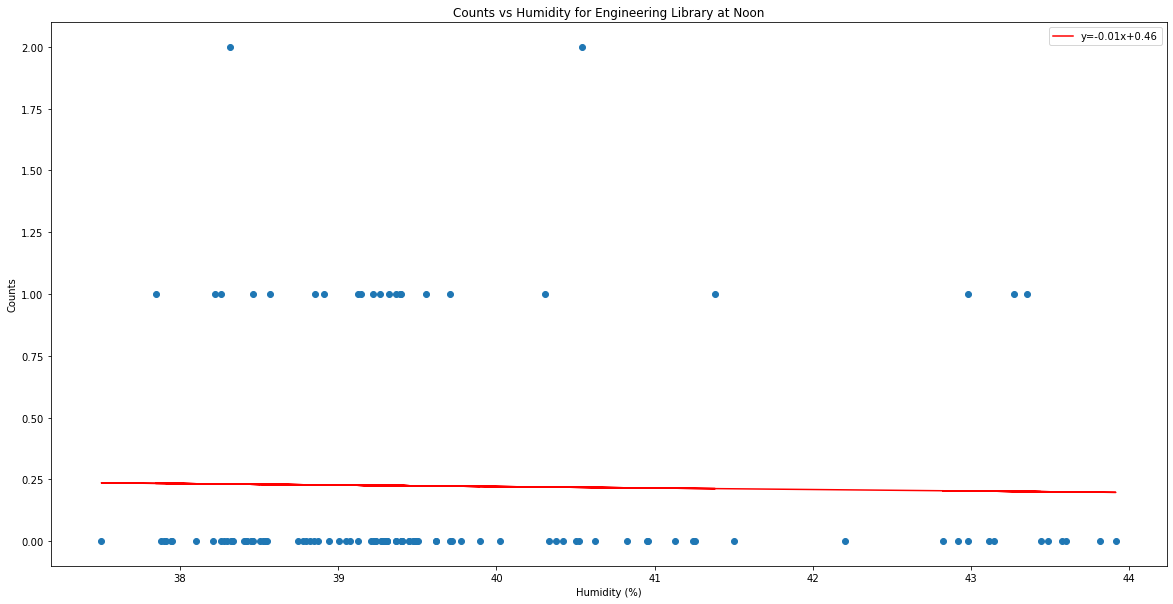

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.04967
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.824
Time:                            13:44:39   Log-Likelihood:                -73.859
No. Observations:                     117   AIC:                             151.7
Df Residuals:                         115   BIC:                             157.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [42]:
x = EngNoonData["Humidity"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNoonData["Humidity"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

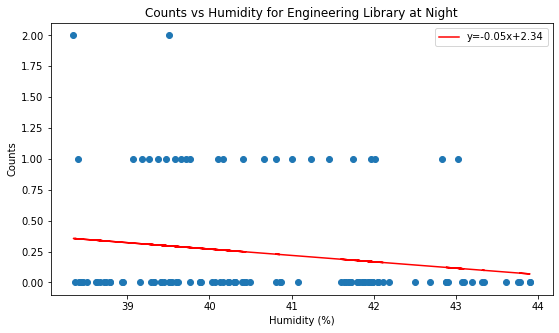

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.029
Model:                                OLS   Adj. R-squared:                  0.021
Method:                     Least Squares   F-statistic:                     3.487
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):             0.0644
Time:                            13:44:39   Log-Likelihood:                -73.443
No. Observations:                     117   AIC:                             150.9
Df Residuals:                         115   BIC:                             156.4
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [43]:
x = EngNightData["Humidity"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNightData["Humidity"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')              
plt.title("Counts vs Humidity for Engineering Library at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

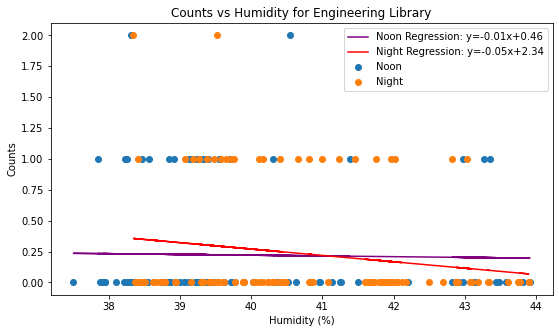

In [44]:
x = EngNoonData["Humidity"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EngNightData["Humidity"]
r = EngNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EngNoonData["Humidity"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["Humidity"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for Engineering Library")   
plt.rcParams['figure.figsize'] = [9, 6]
plt.legend()
plt.show()

#### Etcheverry Hall

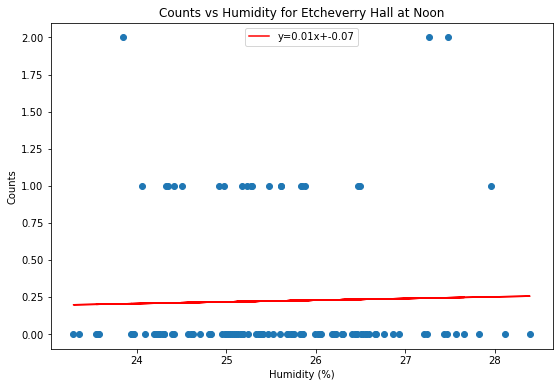

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.08280
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.774
Time:                            13:44:40   Log-Likelihood:                -78.483
No. Observations:                     117   AIC:                             161.0
Df Residuals:                         115   BIC:                             166.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [45]:
x = EtchNoonData["Humidity"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNoonData["Humidity"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Etcheverry Hall at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

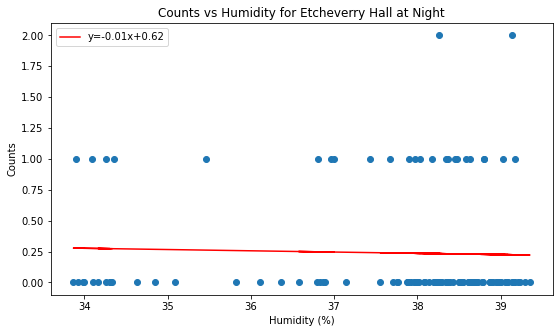

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.007
Method:                     Least Squares   F-statistic:                    0.1389
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.710
Time:                            13:44:40   Log-Likelihood:                -76.358
No. Observations:                     117   AIC:                             156.7
Df Residuals:                         115   BIC:                             162.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [46]:
x = EtchNightData["Humidity"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNightData["Humidity"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Etcheverry Hall at Night") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

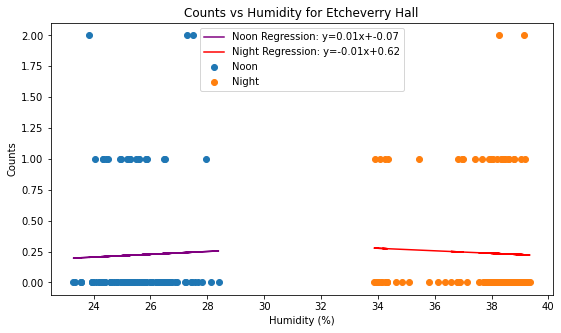

In [47]:
x = EtchNoonData["Humidity"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EtchNightData["Humidity"]
r = EtchNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EtchNoonData["Humidity"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["Humidity"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Hearst Mining Building

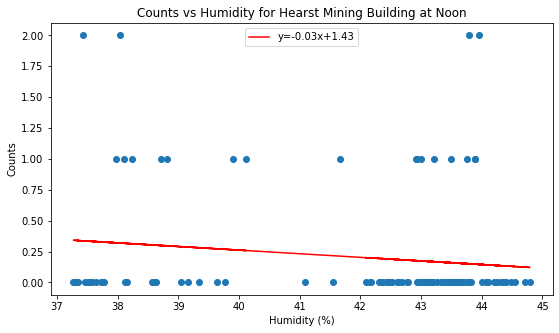

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.021
Model:                                OLS   Adj. R-squared:                  0.012
Method:                     Least Squares   F-statistic:                     2.462
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.119
Time:                            13:44:41   Log-Likelihood:                -79.162
No. Observations:                     117   AIC:                             162.3
Df Residuals:                         115   BIC:                             167.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [48]:
x = HearstNoonData["Humidity"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNoonData["Humidity"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

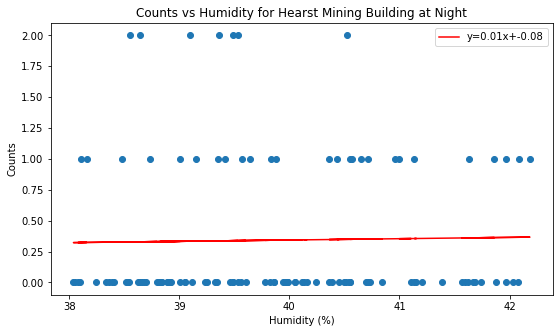

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.04838
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.826
Time:                            13:44:41   Log-Likelihood:                -103.68
No. Observations:                     117   AIC:                             211.4
Df Residuals:                         115   BIC:                             216.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [49]:
x = HearstNightData["Humidity"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNightData["Humidity"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

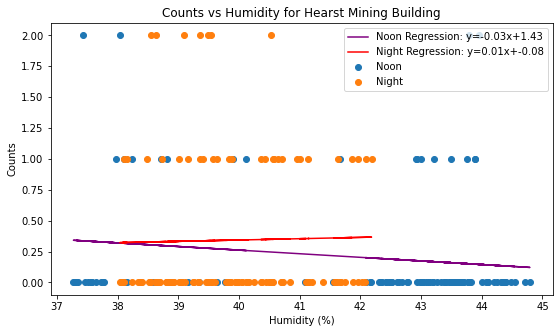

In [50]:
x = HearstNoonData["Humidity"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = HearstNightData["Humidity"]
r = HearstNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(HearstNoonData["Humidity"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["Humidity"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

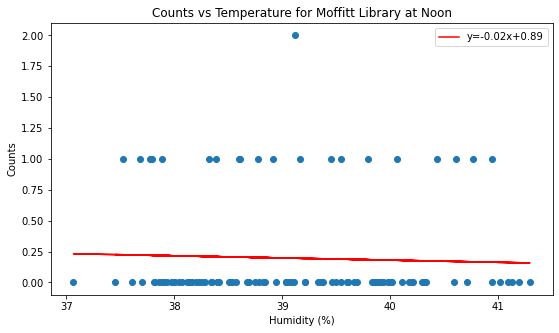

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.007
Method:                     Least Squares   F-statistic:                    0.2080
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.649
Time:                            13:44:42   Log-Likelihood:                -63.957
No. Observations:                     117   AIC:                             131.9
Df Residuals:                         115   BIC:                             137.4
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [51]:
x = MoffittNoonData["Humidity"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNoonData["Humidity"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Temperature for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

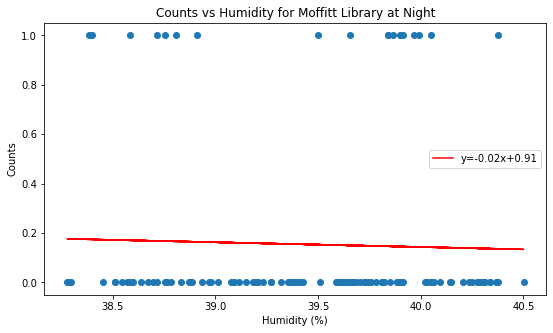

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                    0.1114
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.739
Time:                            13:44:42   Log-Likelihood:                -46.686
No. Observations:                     117   AIC:                             97.37
Df Residuals:                         115   BIC:                             102.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [52]:
x = MoffittNightData["Humidity"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNightData["Humidity"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

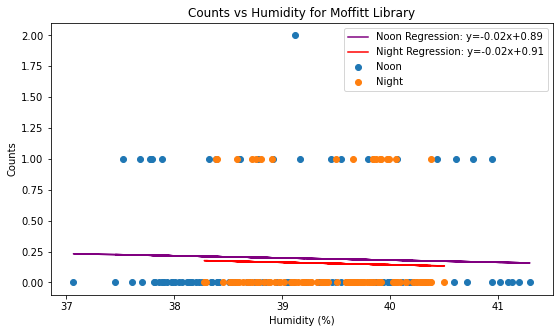

In [53]:
x = MoffittNoonData["Humidity"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = MoffittNightData["Humidity"]
r = MoffittNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(MoffittNoonData["Humidity"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["Humidity"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 8]
plt.legend()
plt.show()

#### All Buildings at Noon

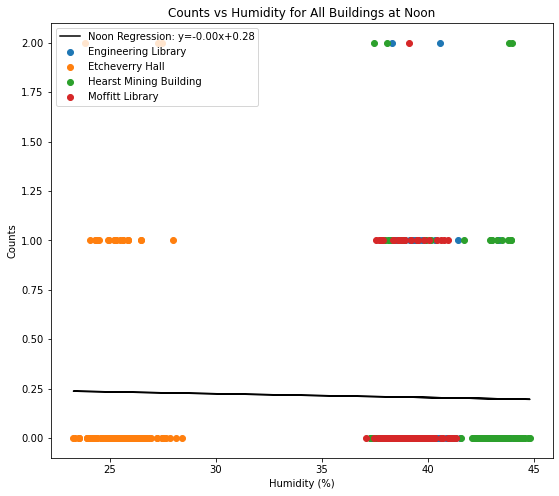

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3634
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.547
Time:                        13:44:43   Log-Likelihood:                -298.16
No. Observations:                 468   AIC:                             600.3
Df Residuals:                     466   BIC:                             608.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2816      0.118      2.384      0.0

In [54]:
x = []
x.extend(EngNoonData["Humidity"])
x.extend(EtchNoonData["Humidity"])
x.extend(HearstNoonData["Humidity"])
x.extend(MoffittNoonData["Humidity"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["Humidity"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["Humidity"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["Humidity"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["Humidity"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

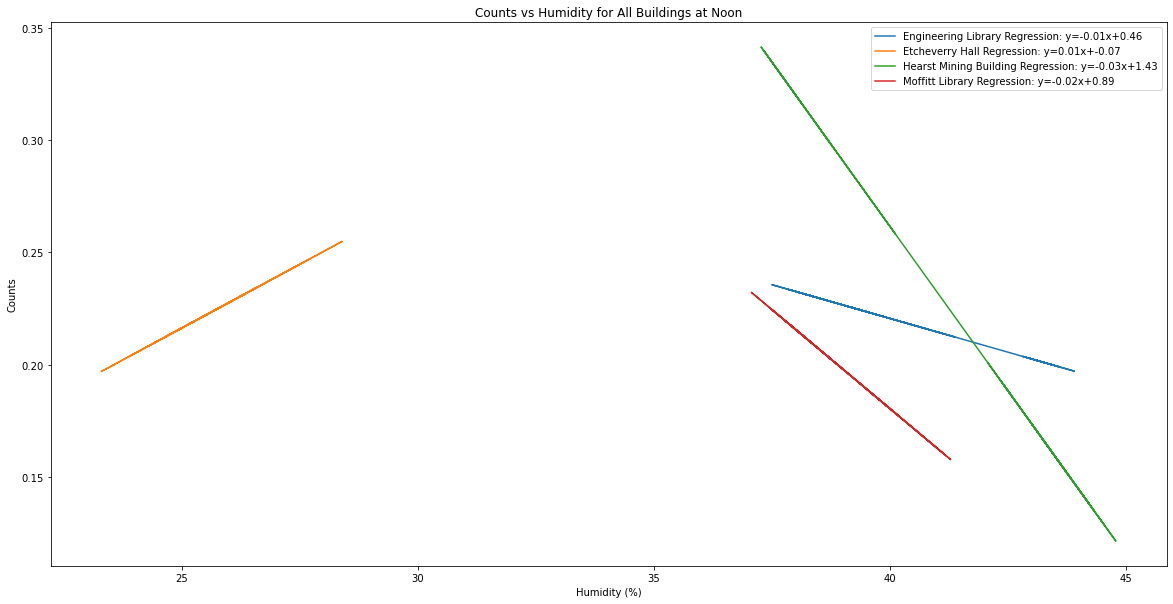

In [55]:
x = EngNoonData["Humidity"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNoonData["Humidity"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNoonData["Humidity"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNoonData["Humidity"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

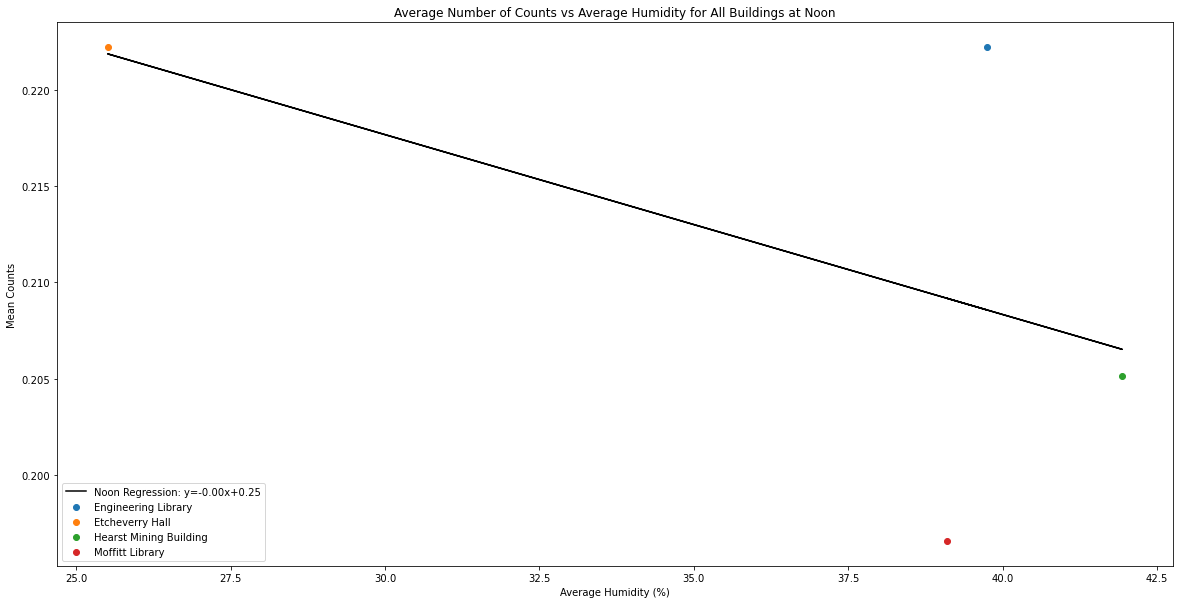

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.8410
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.456
Time:                        13:44:44   Log-Likelihood:                 13.028
No. Observations:                   4   AIC:                            -22.06
Df Residuals:                       2   BIC:                            -23.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2457      0.038      6.500      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [56]:
x = [np.mean(EngNoonData["Humidity"]), np.mean(EtchNoonData["Humidity"]), np.mean(HearstNoonData["Humidity"]), np.mean(MoffittNoonData["Humidity"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["Humidity"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["Humidity"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["Humidity"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["Humidity"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Humidity (%)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Humidity for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

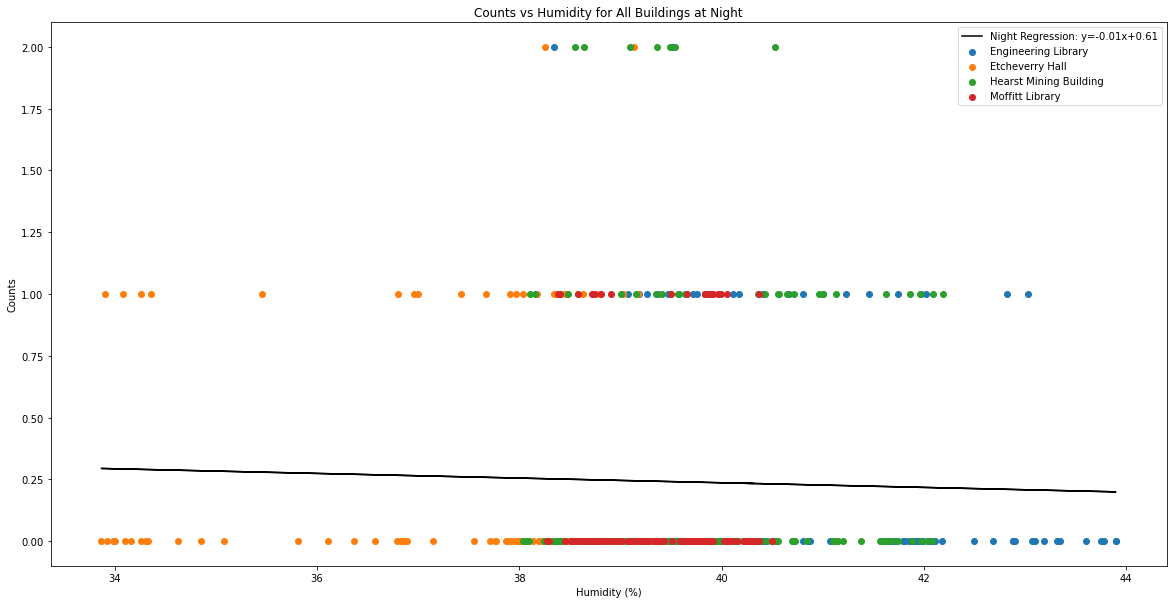

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5220
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.470
Time:                        13:44:45   Log-Likelihood:                -320.06
No. Observations:                 468   AIC:                             644.1
Df Residuals:                     466   BIC:                             652.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6135      0.515      1.190      0.2

In [57]:
x = []
x.extend(EngNightData["Humidity"])
x.extend(EtchNightData["Humidity"])
x.extend(HearstNightData["Humidity"])
x.extend(MoffittNightData["Humidity"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["Humidity"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["Humidity"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["Humidity"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["Humidity"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

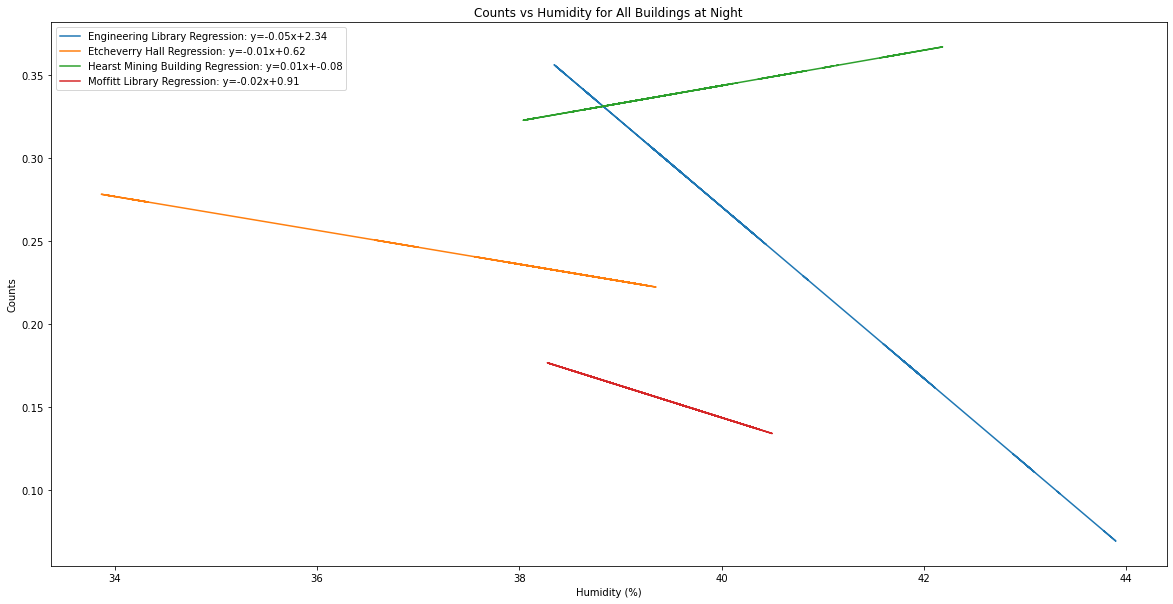

In [58]:
x = EngNightData["Humidity"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNightData["Humidity"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNightData["Humidity"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNightData["Humidity"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

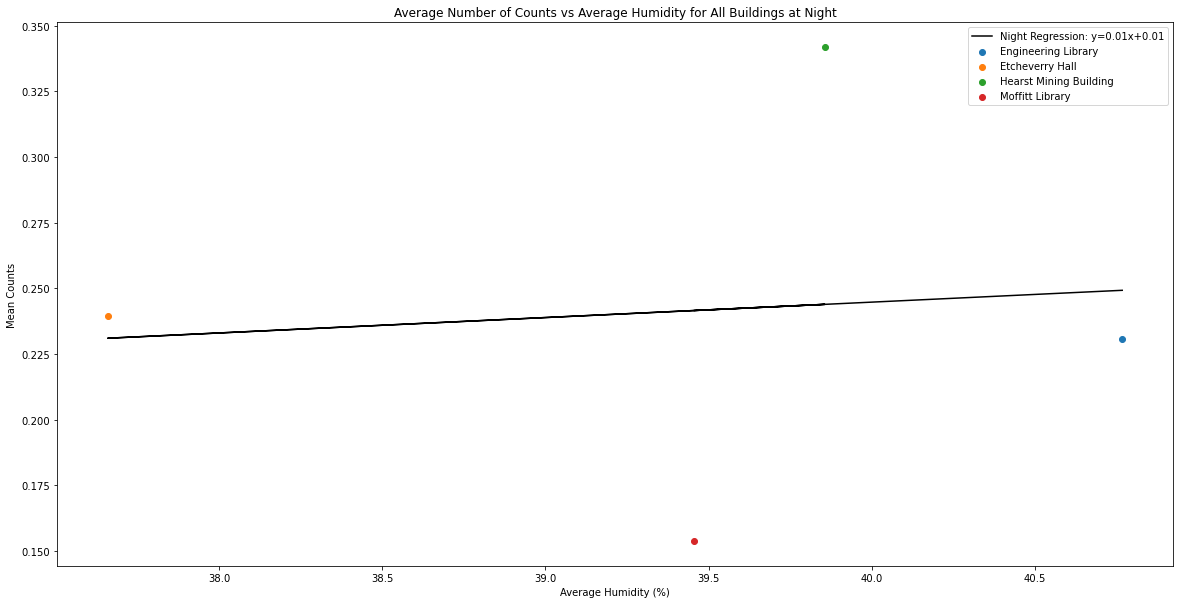

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.485
Method:                 Least Squares   F-statistic:                   0.01985
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.901
Time:                        13:44:45   Log-Likelihood:                 5.1648
No. Observations:                   4   AIC:                            -6.330
Df Residuals:                       2   BIC:                            -7.557
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0102      1.642      0.006      0.9

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [59]:
x = [np.mean(EngNightData["Humidity"]), np.mean(EtchNightData["Humidity"]), np.mean(HearstNightData["Humidity"]), np.mean(MoffittNightData["Humidity"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["Humidity"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["Humidity"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["Humidity"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["Humidity"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Humidity (%)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Humidity for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

### Plot Radiation vs Pressure Data for Both Noon and Night Times at Each Location

#### Engineering Library

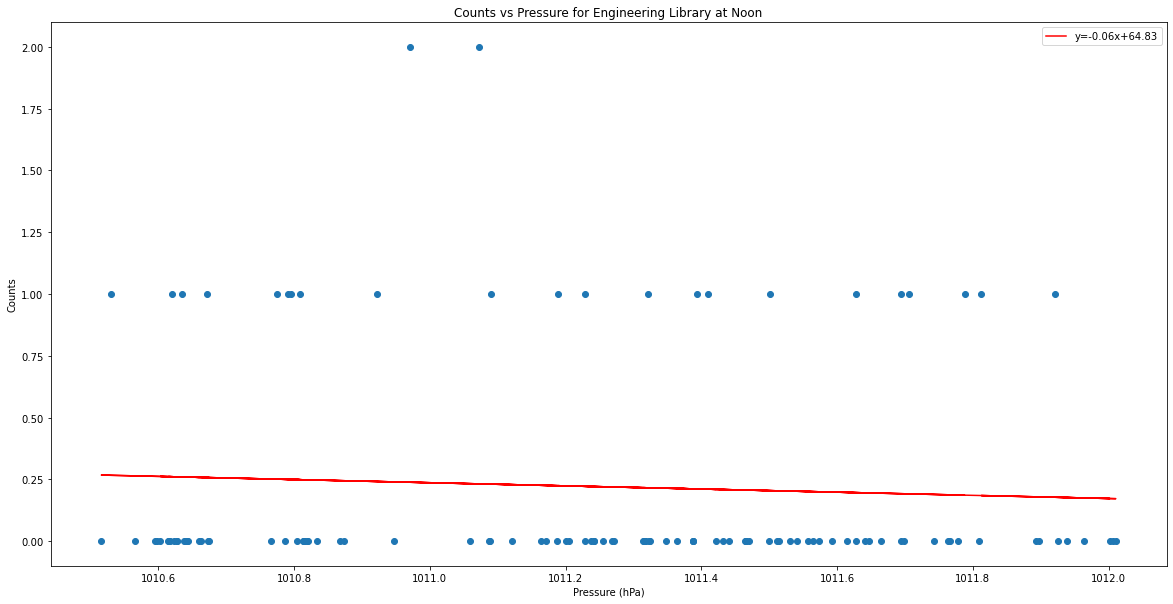

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.004
Model:                                OLS   Adj. R-squared:                 -0.005
Method:                     Least Squares   F-statistic:                    0.4234
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.517
Time:                            13:44:46   Log-Likelihood:                -73.669
No. Observations:                     117   AIC:                             151.3
Df Residuals:                         115   BIC:                             156.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [60]:
x = EngNoonData["Pressure"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNoonData["Pressure"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.title("Counts vs Pressure for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

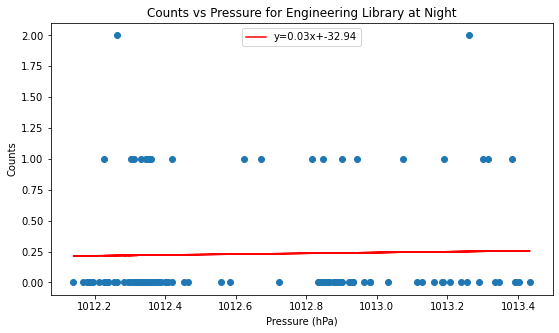

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.08621
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.770
Time:                            13:44:46   Log-Likelihood:                -75.147
No. Observations:                     117   AIC:                             154.3
Df Residuals:                         115   BIC:                             159.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [61]:
x = EngNightData["Pressure"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNightData["Pressure"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')              
plt.title("Counts vs Pressure for Engineering Library at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

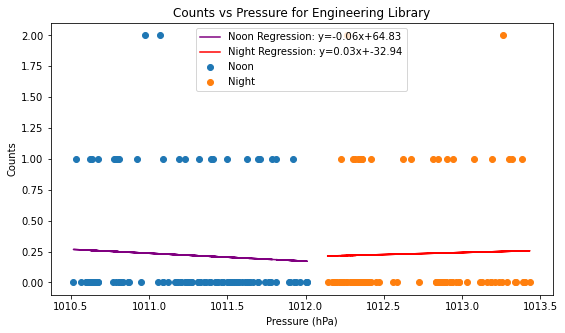

In [62]:
x = EngNoonData["Pressure"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EngNightData["Pressure"]
r = EngNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EngNoonData["Pressure"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["Pressure"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for Engineering Library")  
plt.rcParams['figure.figsize'] = [9,5]
plt.legend()
plt.show()

#### Etcheverry Hall

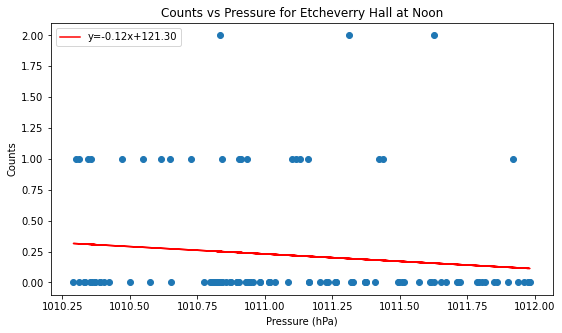

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.014
Model:                                OLS   Adj. R-squared:                  0.006
Method:                     Least Squares   F-statistic:                     1.647
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.202
Time:                            13:44:47   Log-Likelihood:                -77.693
No. Observations:                     117   AIC:                             159.4
Df Residuals:                         115   BIC:                             164.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [63]:
x = EtchNoonData["Pressure"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNoonData["Pressure"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.title("Counts vs Pressure for Etcheverry Hall at Noon")          
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

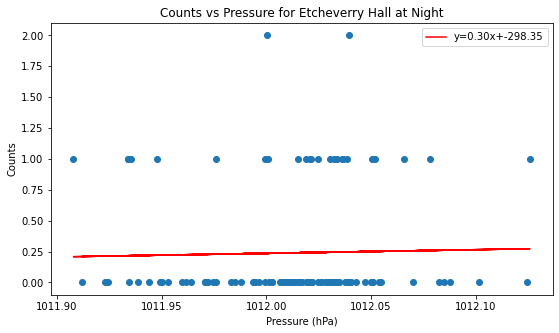

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.07819
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.780
Time:                            13:44:47   Log-Likelihood:                -76.389
No. Observations:                     117   AIC:                             156.8
Df Residuals:                         115   BIC:                             162.3
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [64]:
x = EtchNightData["Pressure"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNightData["Pressure"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')              
plt.title("Counts vs Pressure for Etcheverry Hall at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

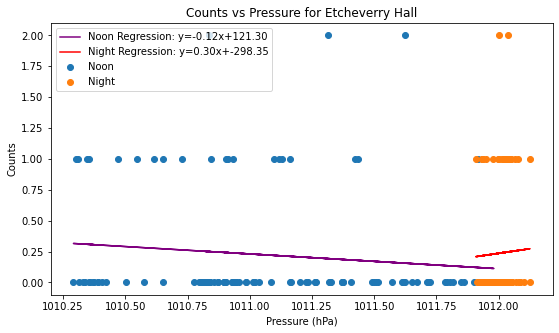

In [65]:
x = EtchNoonData["Pressure"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EtchNightData["Pressure"]
r = EtchNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EtchNoonData["Pressure"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["Pressure"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 7]
plt.legend()
plt.show()

#### Hearst Mining Building

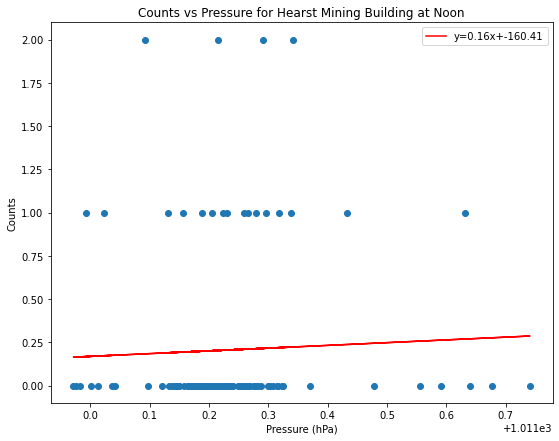

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.007
Method:                     Least Squares   F-statistic:                    0.2060
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.651
Time:                            13:44:48   Log-Likelihood:                -80.297
No. Observations:                     117   AIC:                             164.6
Df Residuals:                         115   BIC:                             170.1
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [66]:
x = HearstNoonData["Pressure"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNoonData["Pressure"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.title("Counts vs Pressure for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

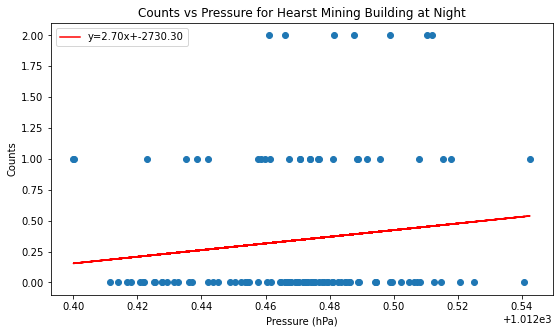

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.018
Model:                                OLS   Adj. R-squared:                  0.009
Method:                     Least Squares   F-statistic:                     2.074
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.153
Time:                            13:44:48   Log-Likelihood:                -102.66
No. Observations:                     117   AIC:                             209.3
Df Residuals:                         115   BIC:                             214.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

In [67]:
x = HearstNightData["Pressure"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNightData["Pressure"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.title("Counts vs Pressure for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

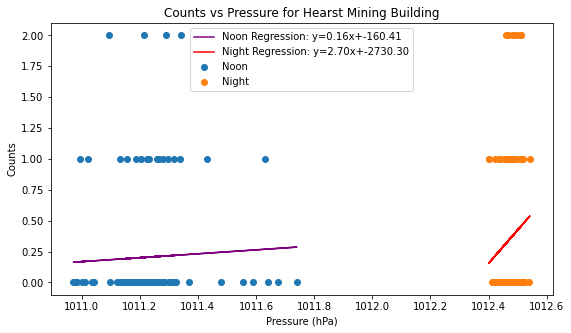

In [68]:
x = HearstNoonData["Pressure"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = HearstNightData["Pressure"]
r = HearstNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(HearstNoonData["Pressure"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["Pressure"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

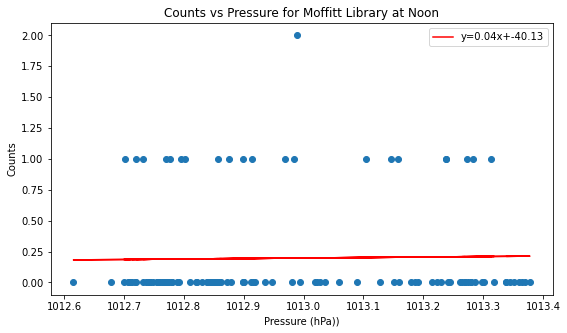

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.05101
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.822
Time:                            13:44:49   Log-Likelihood:                -64.037
No. Observations:                     117   AIC:                             132.1
Df Residuals:                         115   BIC:                             137.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [69]:
x = MoffittNoonData["Pressure"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNoonData["Pressure"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa))')
plt.title("Counts vs Pressure for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

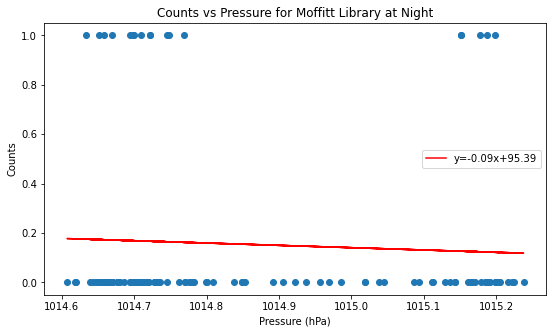

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.003
Model:                                OLS   Adj. R-squared:                 -0.006
Method:                     Least Squares   F-statistic:                    0.3514
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.554
Time:                            13:44:49   Log-Likelihood:                -46.564
No. Observations:                     117   AIC:                             97.13
Df Residuals:                         115   BIC:                             102.7
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [70]:
x = MoffittNightData["Pressure"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNightData["Pressure"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.title("Counts vs Pressure for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

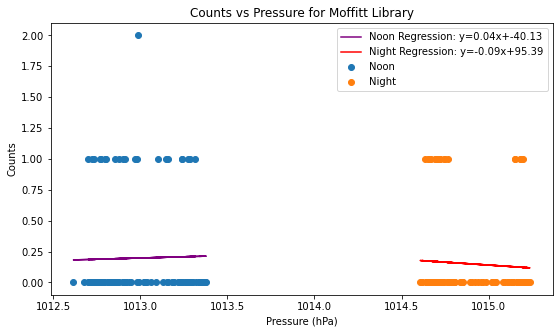

In [71]:
x = MoffittNoonData["Pressure"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = MoffittNightData["Pressure"]
r = MoffittNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(MoffittNoonData["Pressure"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["Pressure"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### All Buildings at Noon

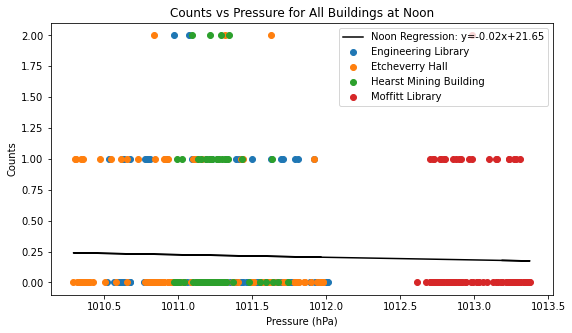

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7269
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.394
Time:                        13:44:50   Log-Likelihood:                -297.98
No. Observations:                 468   AIC:                             600.0
Df Residuals:                     466   BIC:                             608.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6506     25.146      0.861      0.3

In [72]:
x = []
x.extend(EngNoonData["Pressure"])
x.extend(EtchNoonData["Pressure"])
x.extend(HearstNoonData["Pressure"])
x.extend(MoffittNoonData["Pressure"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["Pressure"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["Pressure"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["Pressure"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["Pressure"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

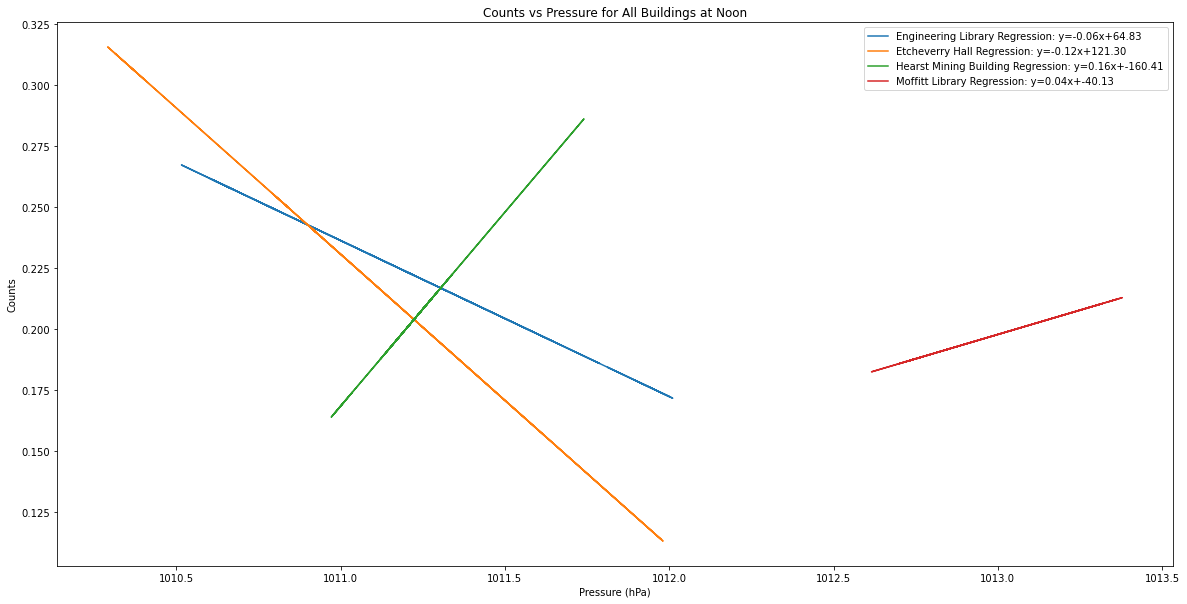

In [73]:
x = EngNoonData["Pressure"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNoonData["Pressure"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNoonData["Pressure"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNoonData["Pressure"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

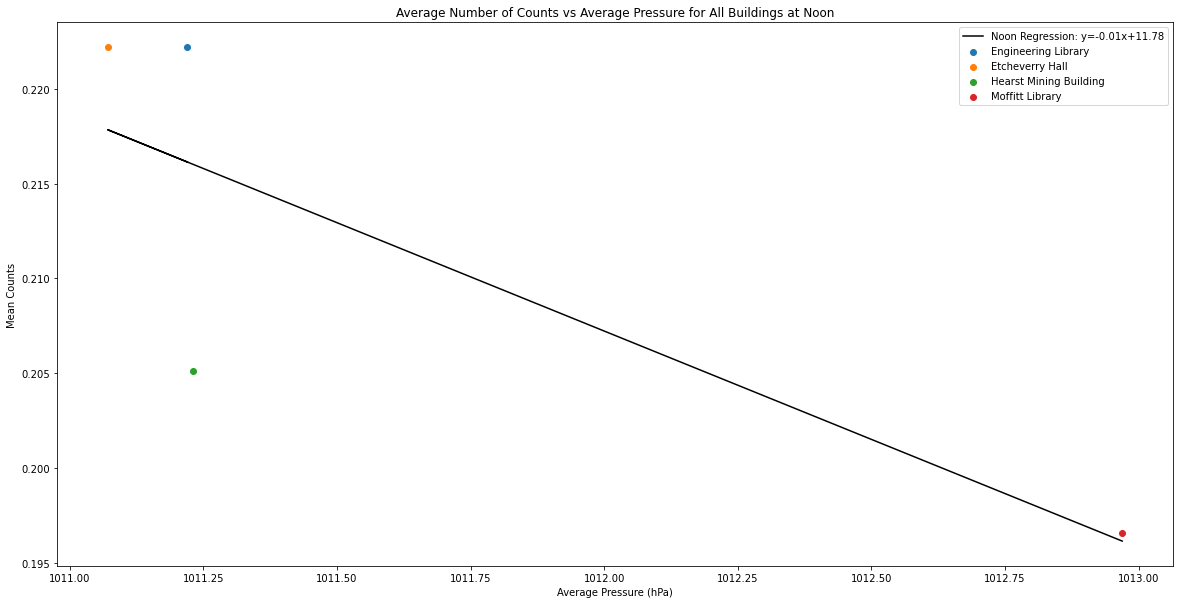

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     3.643
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.197
Time:                        13:44:51   Log-Likelihood:                 14.401
No. Observations:                   4   AIC:                            -24.80
Df Residuals:                       2   BIC:                            -26.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7801      6.061      1.944      0.1

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [74]:
x = [np.mean(EngNoonData["Pressure"]), np.mean(EtchNoonData["Pressure"]), np.mean(HearstNoonData["Pressure"]), np.mean(MoffittNoonData["Pressure"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["Pressure"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["Pressure"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["Pressure"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["Pressure"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Pressure (hPa)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Pressure for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

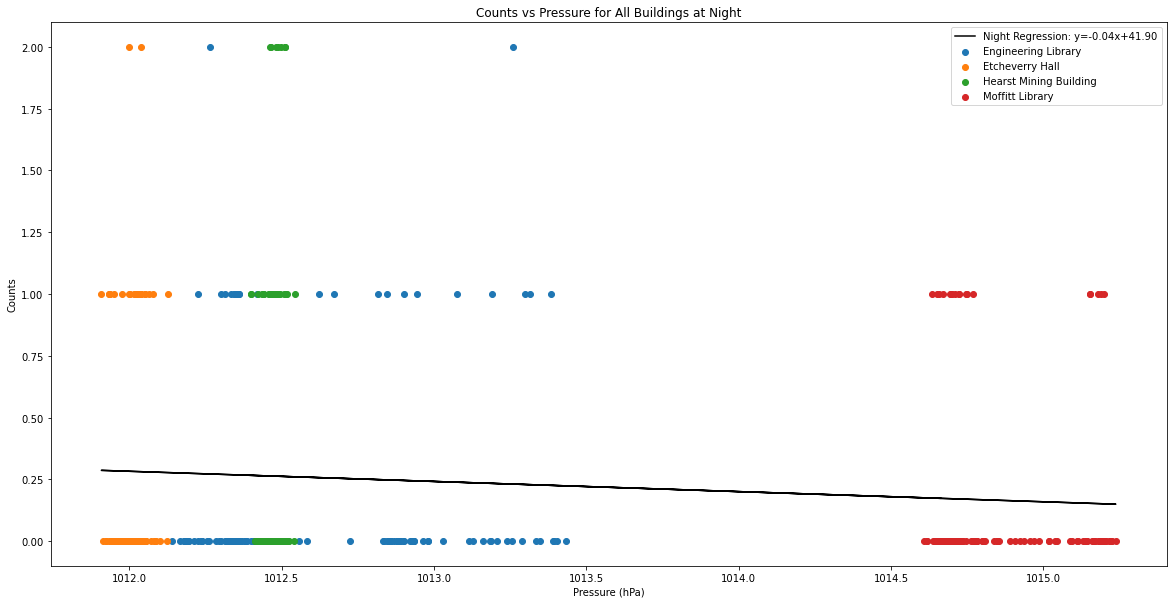

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.350
Date:                Wed, 15 Dec 2021   Prob (F-statistic):             0.0376
Time:                        13:44:51   Log-Likelihood:                -318.15
No. Observations:                 468   AIC:                             640.3
Df Residuals:                     466   BIC:                             648.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9045     19.977      2.098      0.0

In [75]:
x = []
x.extend(EngNightData["Pressure"])
x.extend(EtchNightData["Pressure"])
x.extend(HearstNightData["Pressure"])
x.extend(MoffittNightData["Pressure"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["Pressure"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["Pressure"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["Pressure"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["Pressure"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

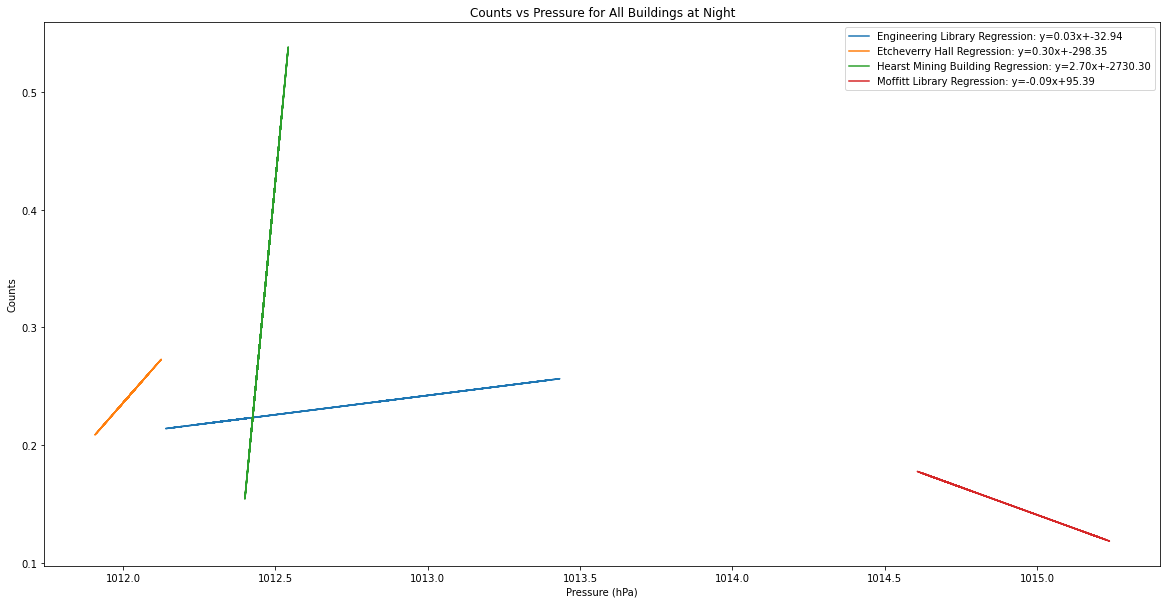

In [76]:
x = EngNightData["Pressure"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNightData["Pressure"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNightData["Pressure"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNightData["Pressure"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

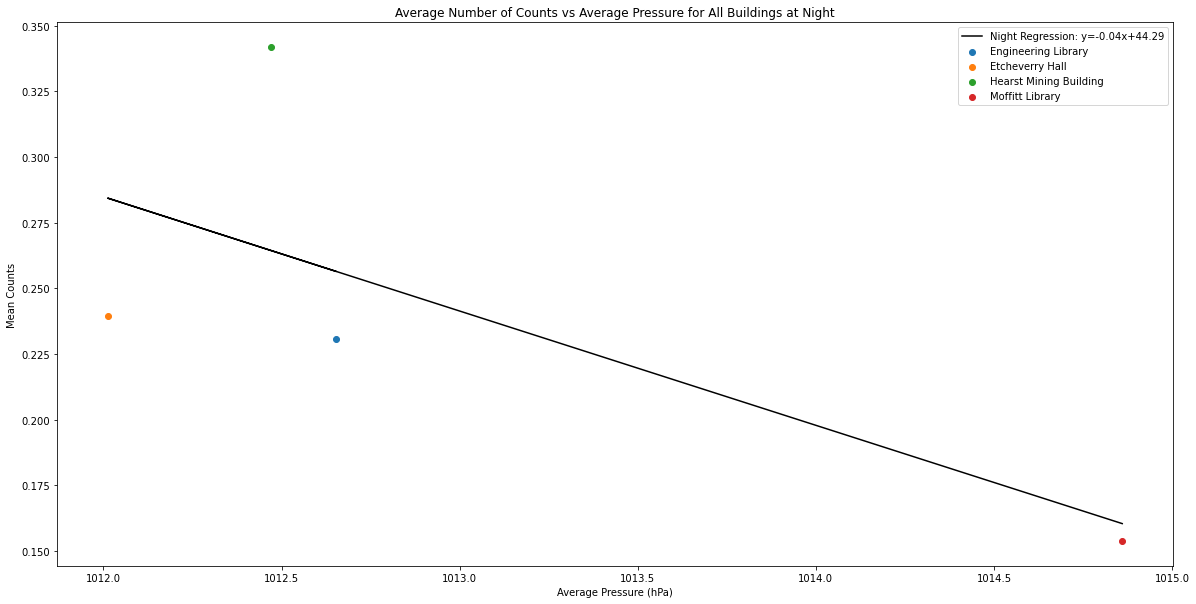

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     2.096
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.285
Time:                        13:44:52   Log-Likelihood:                 6.5787
No. Observations:                   4   AIC:                            -9.157
Df Residuals:                       2   BIC:                            -10.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2937     30.429      1.456      0.2

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [77]:
x = [np.mean(EngNightData["Pressure"]), np.mean(EtchNightData["Pressure"]), np.mean(HearstNightData["Pressure"]), np.mean(MoffittNightData["Pressure"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["Pressure"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["Pressure"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["Pressure"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["Pressure"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Pressure (hPa)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Pressure for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

### Plot Radiation vs Air Quality (PM 1) Data for Both Noon and Night Times at Each Location

#### Engineering Library

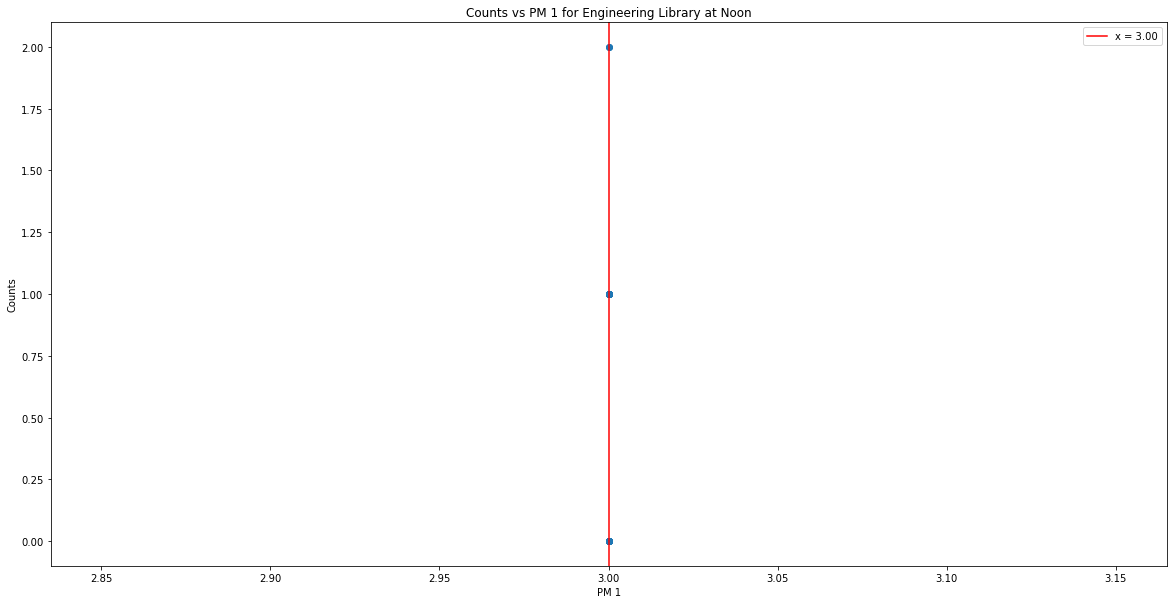

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:44:53   Log-Likelihood:                -73.884
No. Observations:                     117   AIC:                             149.8
Df Residuals:                         116   BIC:                             152.5
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 1        

In [78]:
x = EngNoonData["PM 1"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, 0.096*x, label = 'y=0.096x+0.000'.format(m,b), color = 'red')
plt.axvline(x = 3.0, label = 'x = 3.00', color = 'red')
plt.scatter(EngNoonData["PM 1"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

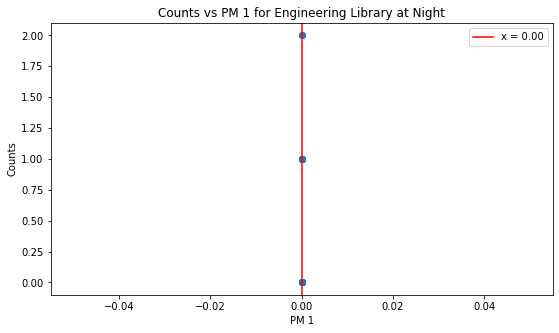

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:44:53   Log-Likelihood:                -75.190
No. Observations:                     117   AIC:                             152.4
Df Residuals:                         116   BIC:                             155.1
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [79]:
x = EngNightData["PM 1"]
y = EngNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EngNightData["PM 1"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')              
plt.title("Counts vs PM 1 for Engineering Library at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

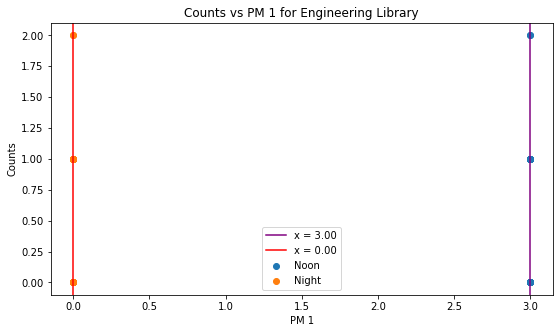

In [80]:
x = EngNoonData["PM 1"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 3.0, label = 'x = 3.00', color = 'purple')
q = EngNightData["PM 1"]
r = EngNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EngNoonData["PM 1"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["PM 1"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for Engineering Library")  
plt.rcParams['figure.figsize'] = [9,5]
plt.legend()
plt.show()

#### Etcheverry Hall

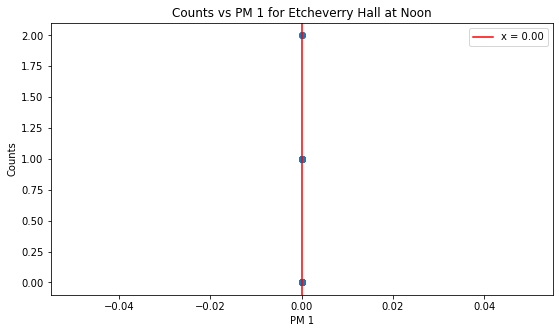

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:44:54   Log-Likelihood:                -78.525
No. Observations:                     117   AIC:                             159.1
Df Residuals:                         116   BIC:                             161.8
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [81]:
x = EtchNoonData["PM 1"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 1"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Etcheverry Hall at Noon")          
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

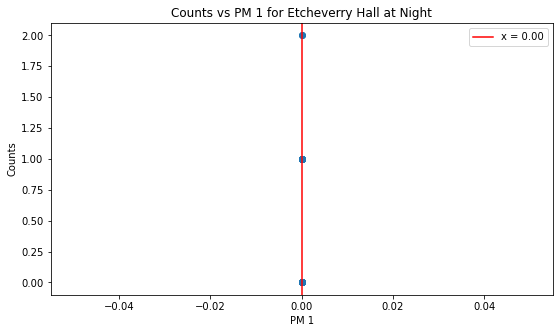

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:44:54   Log-Likelihood:                -76.429
No. Observations:                     117   AIC:                             154.9
Df Residuals:                         116   BIC:                             157.6
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [82]:
x = EtchNightData["PM 1"]
y = EtchNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNightData["PM 1"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')              
plt.title("Counts vs PM 1 for Etcheverry Hall at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

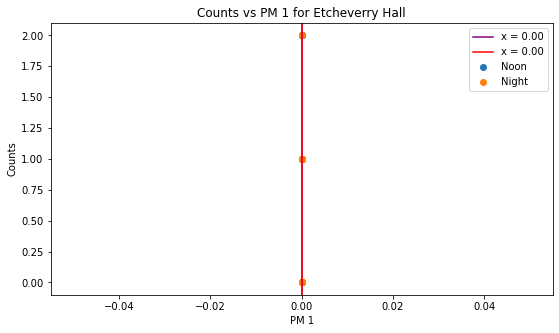

In [83]:
x = EtchNoonData["PM 1"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'purple')
q = EtchNightData["PM 1"]
r = EtchNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 1"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["PM 1"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Hearst Mining Building

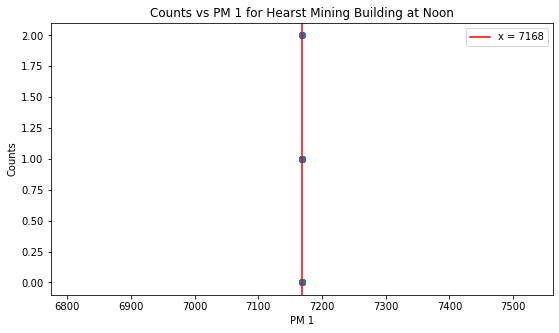

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:44:55   Log-Likelihood:                -80.402
No. Observations:                     117   AIC:                             162.8
Df Residuals:                         116   BIC:                             165.6
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 1        

In [84]:
x = HearstNoonData["PM 1"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 7168, label = 'x = 7168', color = 'red')
plt.scatter(HearstNoonData["PM 1"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

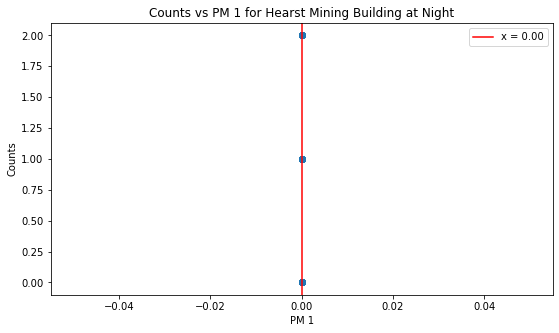

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:44:55   Log-Likelihood:                -103.70
No. Observations:                     117   AIC:                             209.4
Df Residuals:                         116   BIC:                             212.2
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [85]:
x = HearstNightData["PM 1"]
y = HearstNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(HearstNightData["PM 1"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

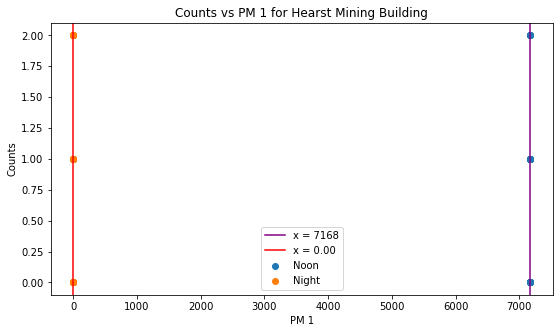

In [86]:
x = HearstNoonData["PM 1"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 7168, label = 'x = 7168', color = 'purple')
q = HearstNightData["PM 1"]
r = HearstNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(HearstNoonData["PM 1"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["PM 1"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

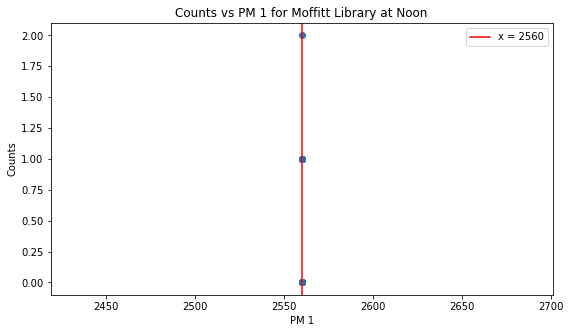

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:44:55   Log-Likelihood:                -64.062
No. Observations:                     117   AIC:                             130.1
Df Residuals:                         116   BIC:                             132.9
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 1        

In [87]:
x = MoffittNoonData["PM 1"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 2560, label = 'x = 2560', color = 'red')
plt.scatter(MoffittNoonData["PM 1"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

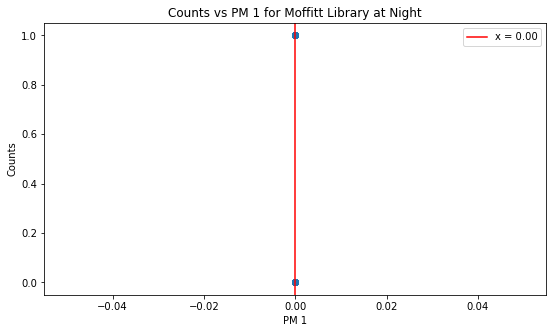

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:44:56   Log-Likelihood:                -46.743
No. Observations:                     117   AIC:                             95.49
Df Residuals:                         116   BIC:                             98.25
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [88]:
x = MoffittNightData["PM 1"]
y = MoffittNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(MoffittNightData["PM 1"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

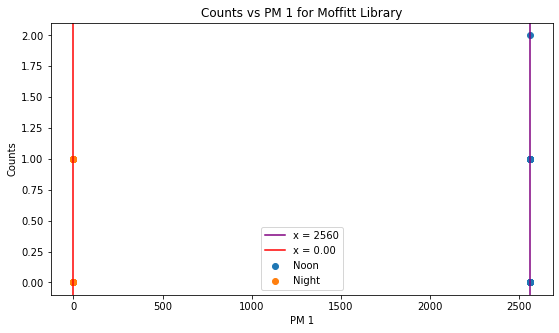

In [89]:
x = MoffittNoonData["PM 1"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 2560, label = 'x = 2560', color = 'purple')
q = MoffittNightData["PM 1"]
r = MoffittNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(MoffittNoonData["PM 1"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["PM 1"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### All Buildings at Noon

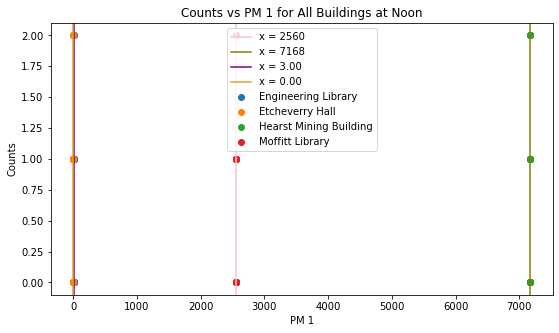

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1151
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.735
Time:                        13:44:57   Log-Likelihood:                -298.28
No. Observations:                 468   AIC:                             600.6
Df Residuals:                     466   BIC:                             608.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2175      0.028      7.890      0.0

In [90]:
x = []
x.extend(EngNoonData["PM 1"])
x.extend(EtchNoonData["PM 1"])
x.extend(HearstNoonData["PM 1"])
x.extend(MoffittNoonData["PM 1"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 2560, label = 'x = 2560', color = 'pink')
plt.axvline(x = 7168, label = 'x = 7168', color = 'olive')
plt.axvline(x = 3, label = 'x = 3.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["PM 1"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["PM 1"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["PM 1"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["PM 1"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

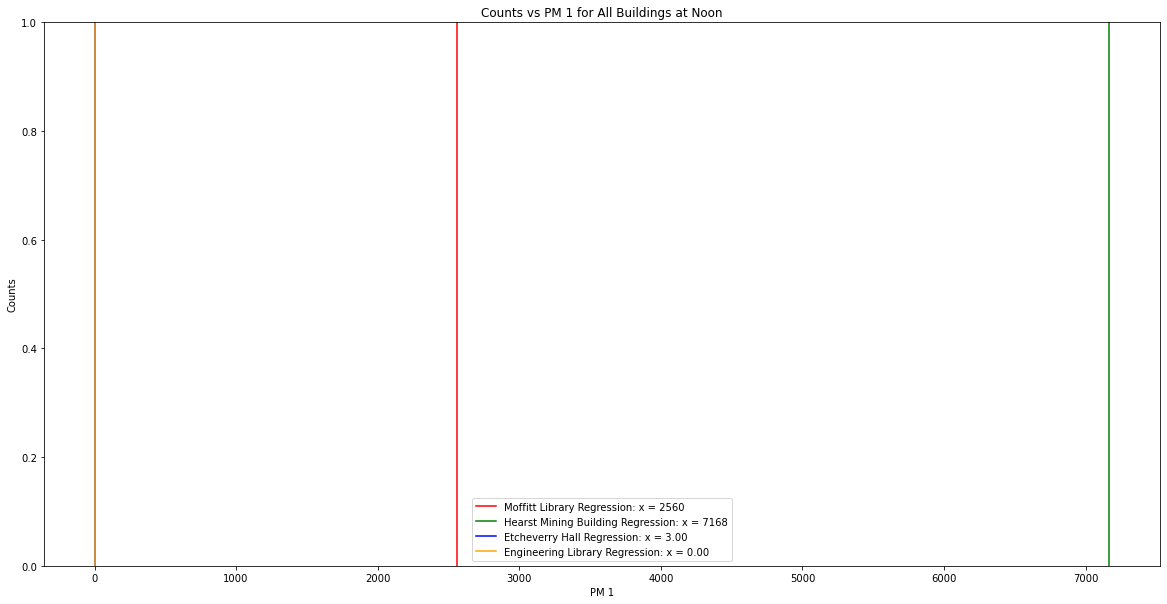

In [91]:
plt.axvline(x = 2560, label = 'Moffitt Library Regression: x = 2560', color = 'red')
plt.axvline(x = 7168, label = 'Hearst Mining Building Regression: x = 7168', color = 'green')
plt.axvline(x = 3, label = 'Etcheverry Hall Regression: x = 3.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

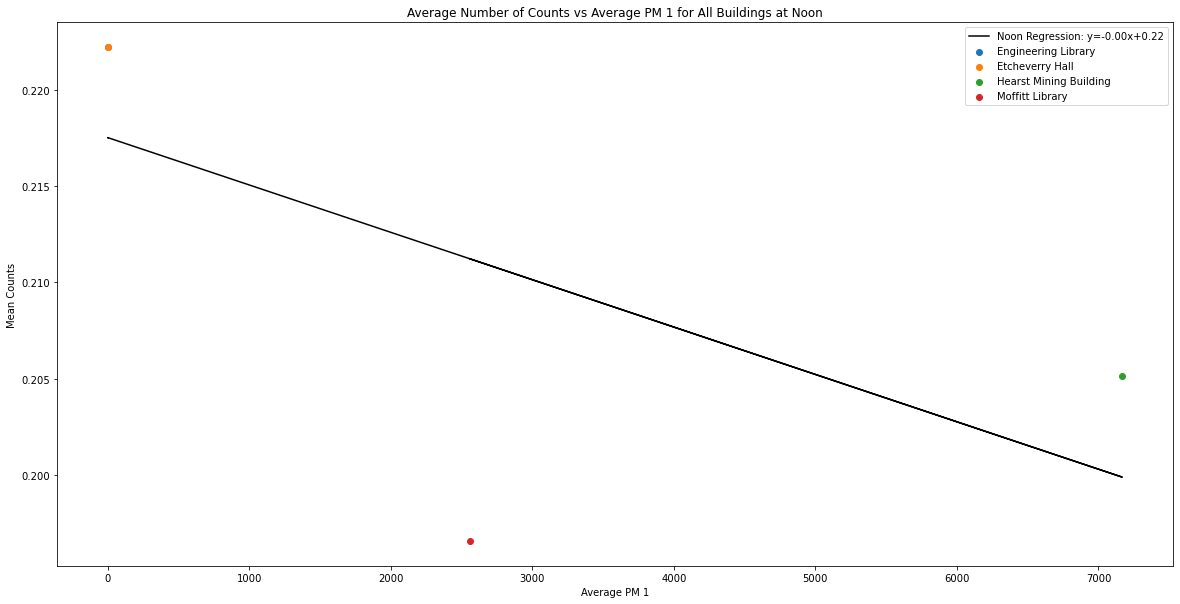

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     1.447
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.352
Time:                        13:44:57   Log-Likelihood:                 13.415
No. Observations:                   4   AIC:                            -22.83
Df Residuals:                       2   BIC:                            -24.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2175      0.008     27.970      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [92]:
x = [np.mean(EngNoonData["PM 1"]), np.mean(EtchNoonData["PM 1"]), np.mean(HearstNoonData["PM 1"]), np.mean(MoffittNoonData["PM 1"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["PM 1"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["PM 1"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["PM 1"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["PM 1"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 1')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 1 for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

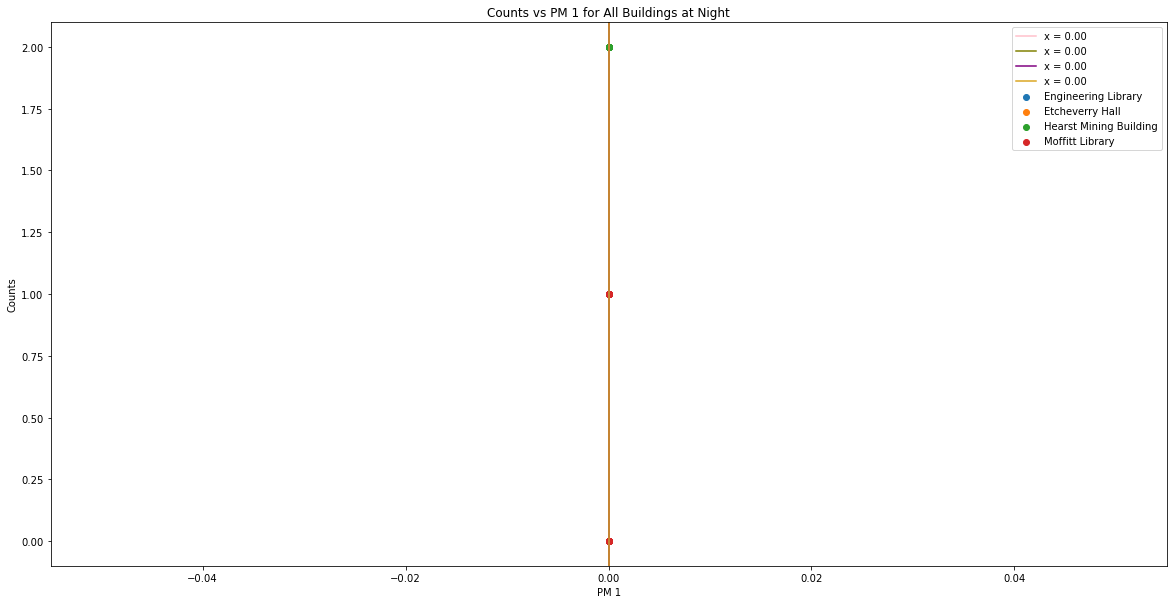

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.182
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.140
Time:                        13:44:58   Log-Likelihood:                -319.23
No. Observations:                 468   AIC:                             642.5
Df Residuals:                     466   BIC:                             650.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3928      0.430     -0.914      0.3

In [93]:
x = []
x.extend(EngNightData["Temperature"])
x.extend(EtchNightData["Temperature"])
x.extend(HearstNightData["Temperature"])
x.extend(MoffittNightData["Temperature"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = 'x = 0.00', color = 'pink')
plt.axvline(x = 0, label = 'x = 0.00', color = 'olive')
plt.axvline(x = 0, label = 'x = 0.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["PM 1"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["PM 1"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["PM 1"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["PM 1"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

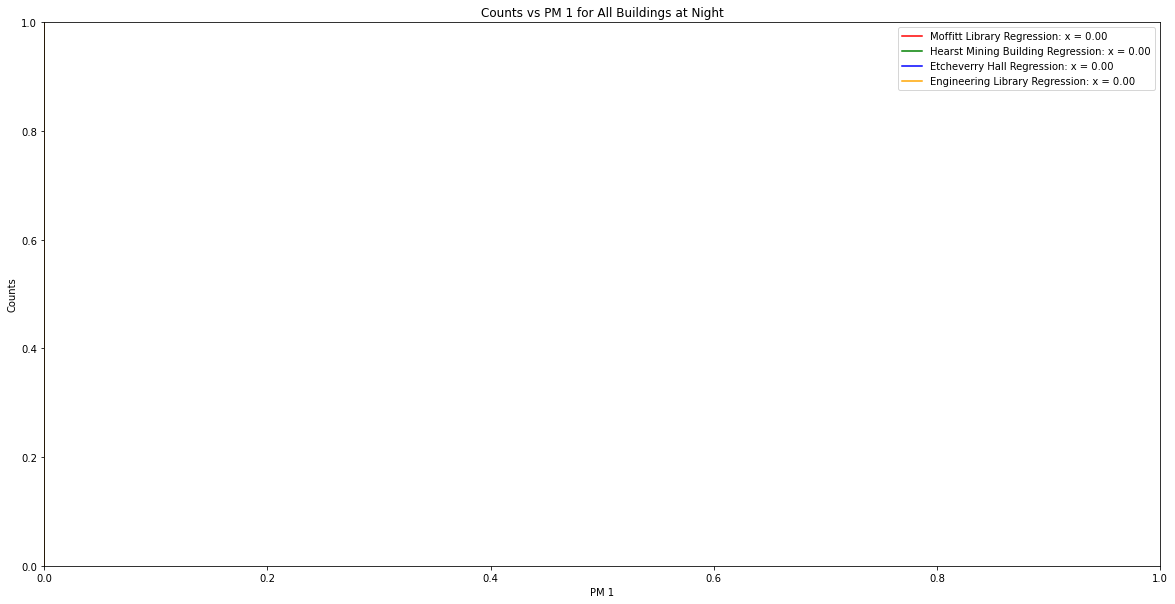

In [94]:
plt.axvline(x = 0, label = 'Moffitt Library Regression: x = 0.00', color = 'red')
plt.axvline(x = 0, label = 'Hearst Mining Building Regression: x = 0.00', color = 'green')
plt.axvline(x = 0, label = 'Etcheverry Hall Regression: x = 0.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

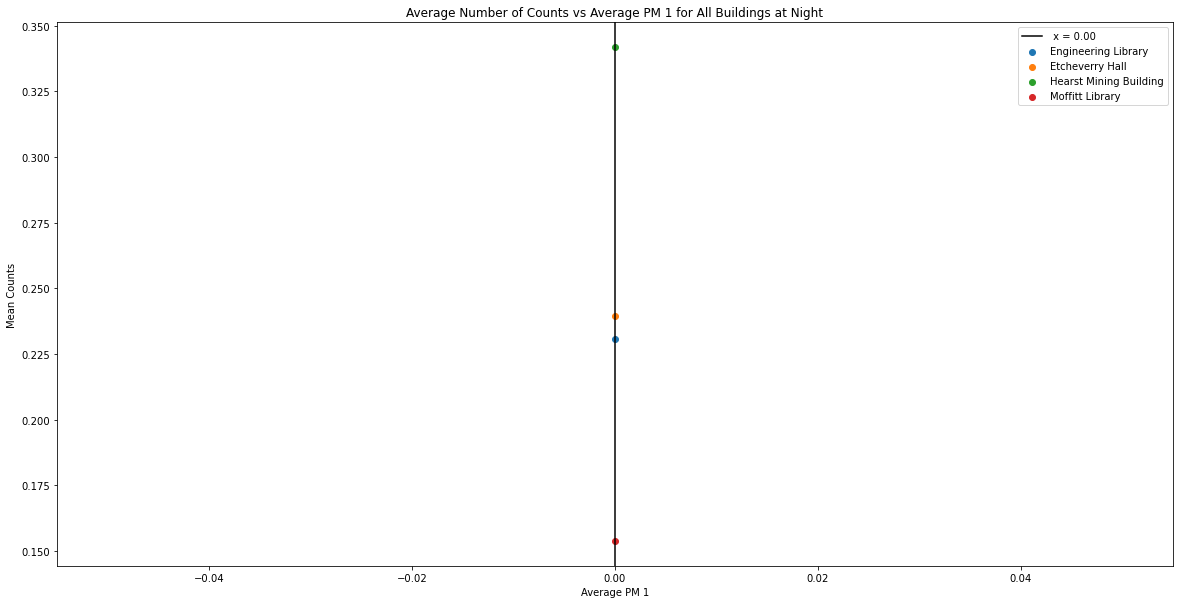

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                        13:44:59   Log-Likelihood:                 5.1451
No. Observations:                   4   AIC:                            -8.290
Df Residuals:                       3   BIC:                            -8.904
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2415      0.039      6.255      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [95]:
x = [np.mean(EngNightData["PM 1"]), np.mean(EtchNightData["PM 1"]), np.mean(HearstNightData["PM 1"]), np.mean(MoffittNightData["PM 1"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = ' x = 0.00', color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["PM 1"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["PM 1"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["PM 1"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["PM 1"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 1')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 1 for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

### Plot Radiation vs Air Quality (PM 2.5) Data for Both Noon and Night Times at Each Location

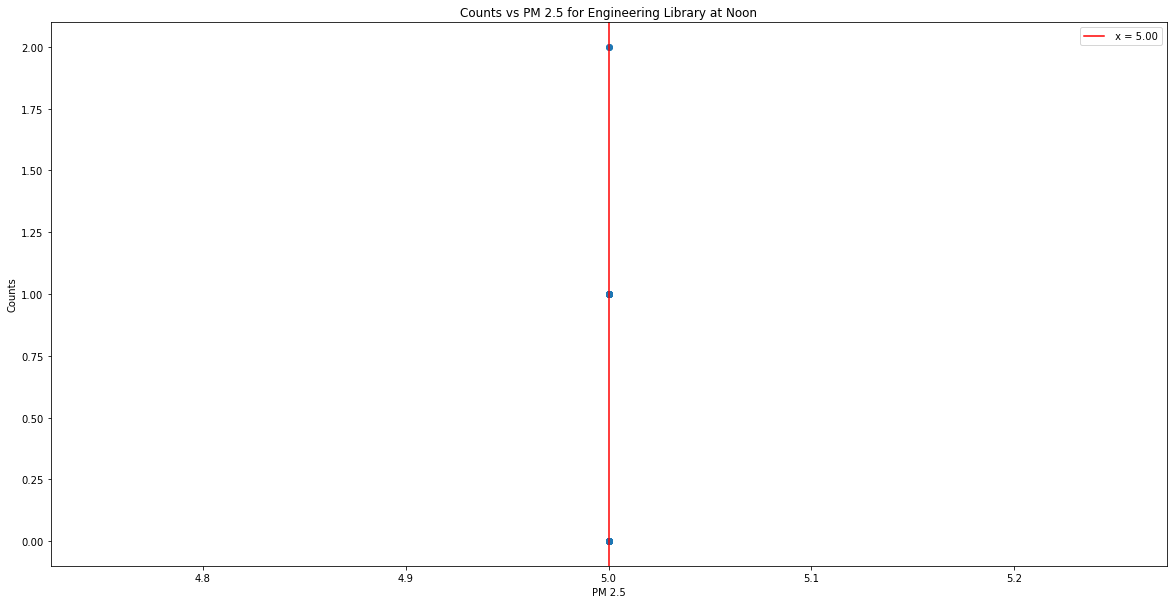

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:44:59   Log-Likelihood:                -73.884
No. Observations:                     117   AIC:                             149.8
Df Residuals:                         116   BIC:                             152.5
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 2.5      

In [96]:
x = EngNoonData["PM 2.5"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 5, label = ' x = 5.00', color = 'red')
plt.scatter(EngNoonData["PM 2.5"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

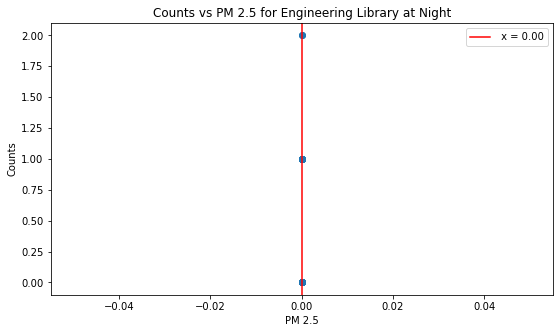

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:44:59   Log-Likelihood:                -75.190
No. Observations:                     117   AIC:                             152.4
Df Residuals:                         116   BIC:                             155.1
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [97]:
x = EngNightData["PM 2.5"]
y = EngNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(EngNightData["PM 2.5"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')              
plt.title("Counts vs PM 2.5 for Engineering Library at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

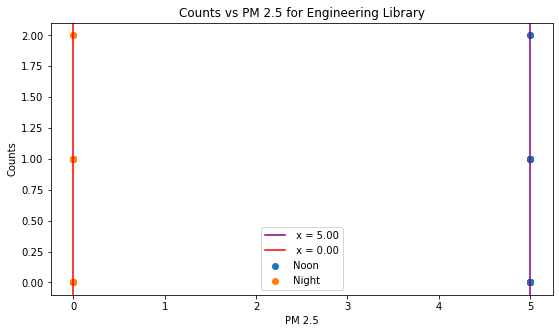

In [98]:
x = EngNoonData["PM 2.5"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 5, label = ' x = 5.00', color = 'purple')
q = EngNightData["PM 2.5"]
r = EngNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(EngNoonData["PM 2.5"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["PM 2.5"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for Engineering Library")  
plt.rcParams['figure.figsize'] = [9,5]
plt.legend()
plt.show()

#### Etcheverry Hall

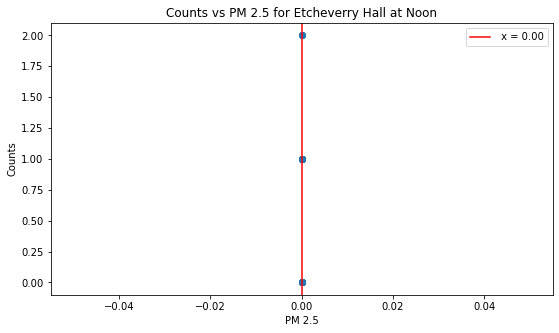

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:00   Log-Likelihood:                -78.525
No. Observations:                     117   AIC:                             159.1
Df Residuals:                         116   BIC:                             161.8
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [99]:
x = EtchNoonData["PM 2.5"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 2.5"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Etcheverry Hall at Noon")          
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

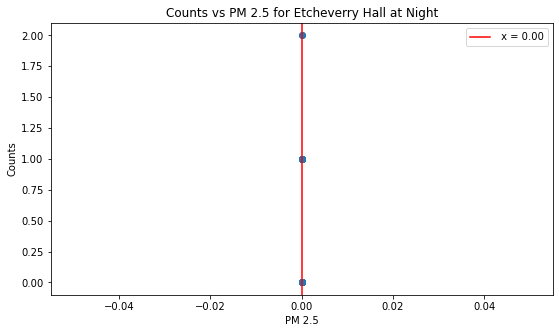

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:00   Log-Likelihood:                -76.429
No. Observations:                     117   AIC:                             154.9
Df Residuals:                         116   BIC:                             157.6
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [100]:
x = EtchNightData["PM 2.5"]
y = EtchNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(EtchNightData["PM 2.5"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')              
plt.title("Counts vs PM 2.5 for Etcheverry Hall at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

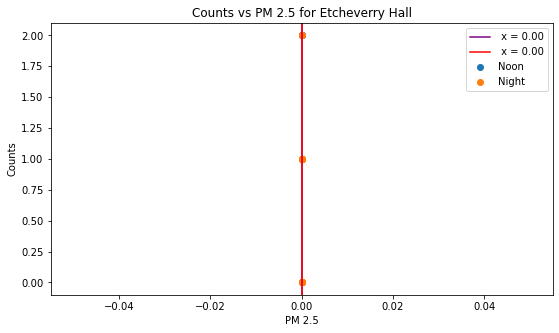

In [101]:
x = EtchNoonData["PM 2.5"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 0, label = ' x = 0.00', color = 'purple')
q = EtchNightData["PM 2.5"]
r = EtchNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 2.5"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["PM 2.5"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Hearst Mining Building

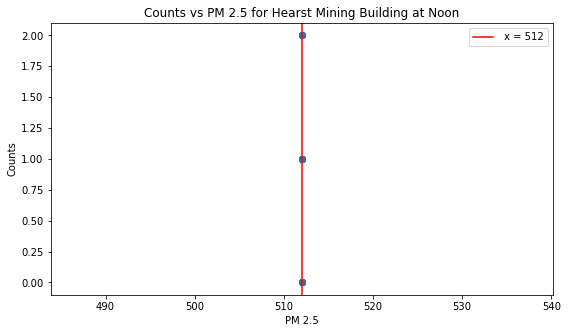

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:01   Log-Likelihood:                -80.402
No. Observations:                     117   AIC:                             162.8
Df Residuals:                         116   BIC:                             165.6
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 2.5      

In [102]:
x = HearstNoonData["PM 2.5"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 512, label = ' x = 512', color = 'red')
plt.scatter(HearstNoonData["PM 2.5"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

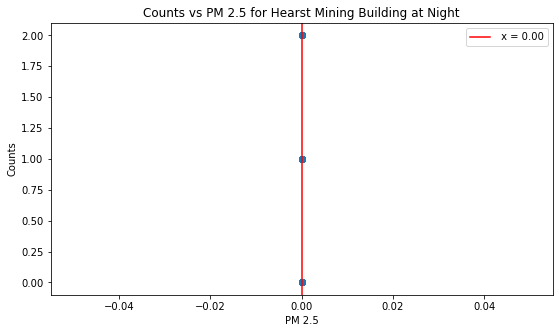

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:01   Log-Likelihood:                -103.70
No. Observations:                     117   AIC:                             209.4
Df Residuals:                         116   BIC:                             212.2
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [103]:
x = HearstNightData["PM 2.5"]
y = HearstNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(HearstNightData["PM 2.5"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

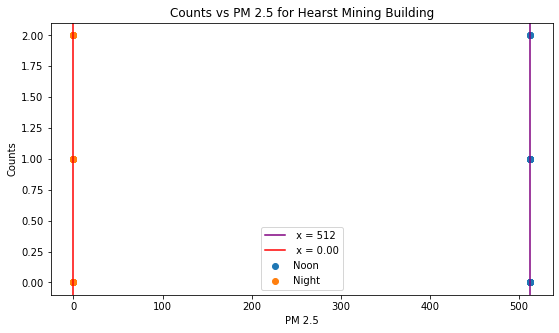

In [104]:
x = HearstNoonData["PM 2.5"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 512, label = ' x = 512', color = 'purple')
q = HearstNightData["PM 2.5"]
r = HearstNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(HearstNoonData["PM 2.5"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["PM 2.5"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

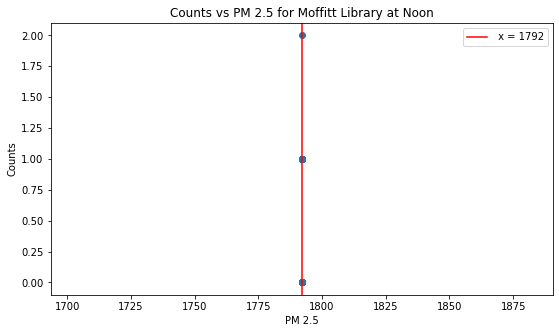

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:02   Log-Likelihood:                -64.062
No. Observations:                     117   AIC:                             130.1
Df Residuals:                         116   BIC:                             132.9
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 2.5      

In [105]:
x = MoffittNoonData["PM 2.5"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 1792, label = ' x = 1792', color = 'red')
plt.scatter(MoffittNoonData["PM 2.5"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

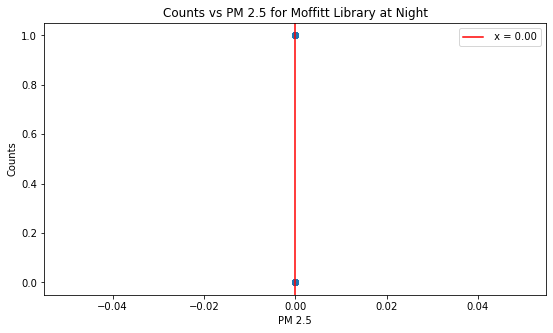

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:02   Log-Likelihood:                -46.743
No. Observations:                     117   AIC:                             95.49
Df Residuals:                         116   BIC:                             98.25
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [106]:
x = MoffittNightData["PM 2.5"]
y = MoffittNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(MoffittNightData["PM 2.5"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

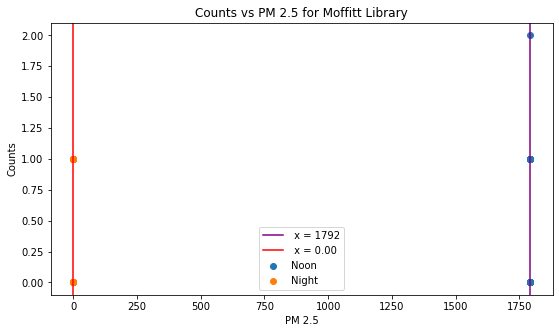

In [107]:
x = MoffittNoonData["PM 2.5"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 1792, label = ' x = 1792', color = 'purple')
q = MoffittNightData["PM 2.5"]
r = MoffittNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(MoffittNoonData["PM 2.5"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["PM 2.5"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### All Buildings at Noon

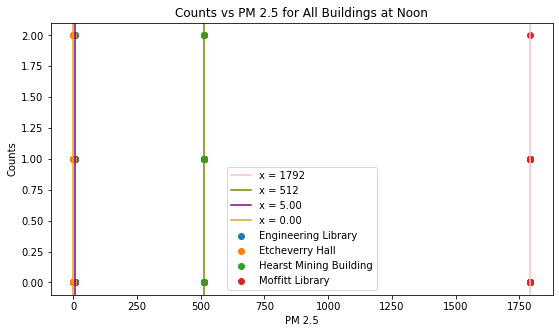

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2344
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.629
Time:                        13:45:03   Log-Likelihood:                -298.22
No. Observations:                 468   AIC:                             600.4
Df Residuals:                     466   BIC:                             608.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2196      0.027      8.133      0.0

In [108]:
x = []
x.extend(EngNoonData["PM 2.5"])
x.extend(EtchNoonData["PM 2.5"])
x.extend(HearstNoonData["PM 2.5"])
x.extend(MoffittNoonData["PM 2.5"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 1792, label = 'x = 1792', color = 'pink')
plt.axvline(x = 512, label = 'x = 512', color = 'olive')
plt.axvline(x = 5, label = 'x = 5.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["PM 2.5"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["PM 2.5"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["PM 2.5"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["PM 2.5"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

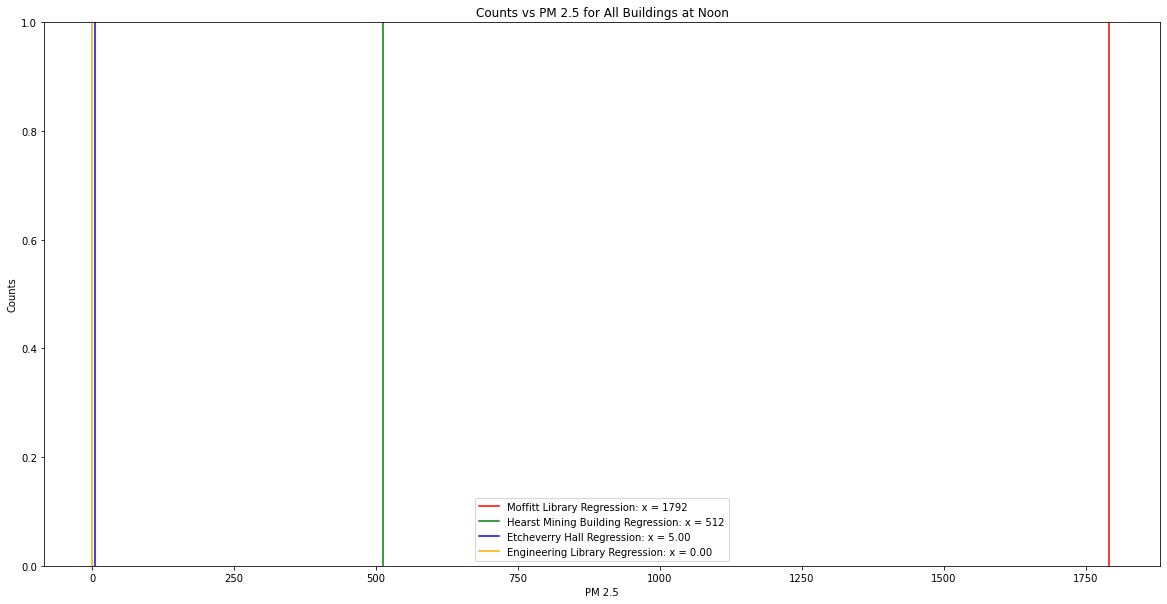

In [109]:
plt.axvline(x = 1792, label = 'Moffitt Library Regression: x = 1792', color = 'red')
plt.axvline(x = 512, label = 'Hearst Mining Building Regression: x = 512', color = 'green')
plt.axvline(x = 5, label = 'Etcheverry Hall Regression: x = 5.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

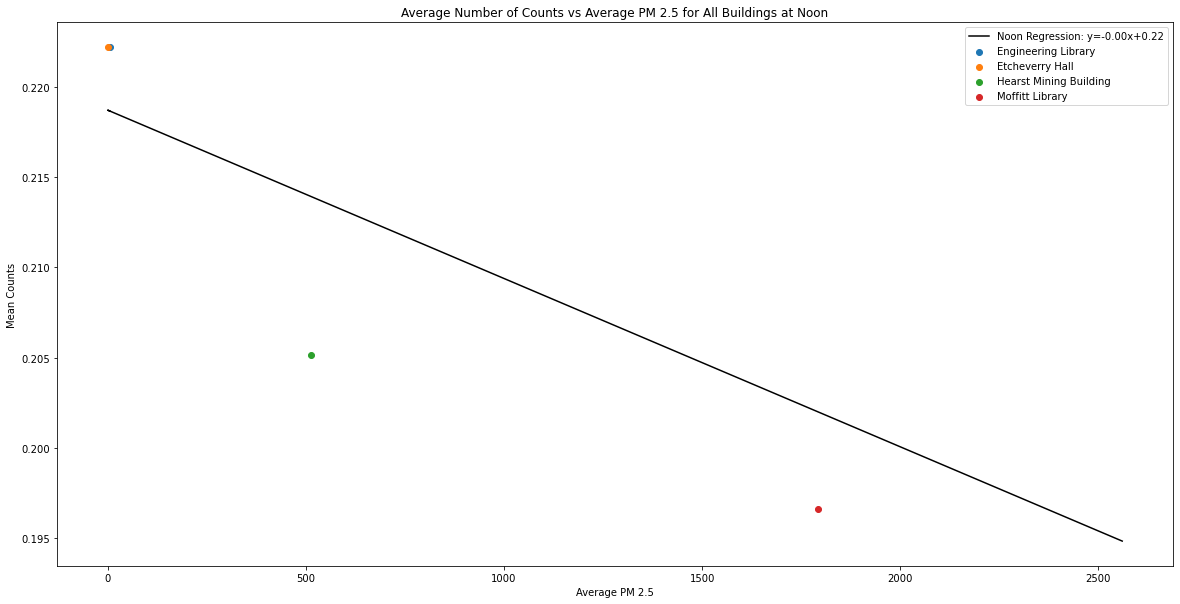

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     7.338
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.114
Time:                        13:45:03   Log-Likelihood:                 15.408
No. Observations:                   4   AIC:                            -26.82
Df Residuals:                       2   BIC:                            -28.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2187      0.004     48.634      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [110]:
x = [np.mean(EngNoonData["PM 2.5"]), np.mean(EtchNoonData["PM 2.5"]), np.mean(HearstNoonData["PM 2.5"]), np.mean(MoffittNoonData["PM 1"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["PM 2.5"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["PM 2.5"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["PM 2.5"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["PM 2.5"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 2.5')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 2.5 for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

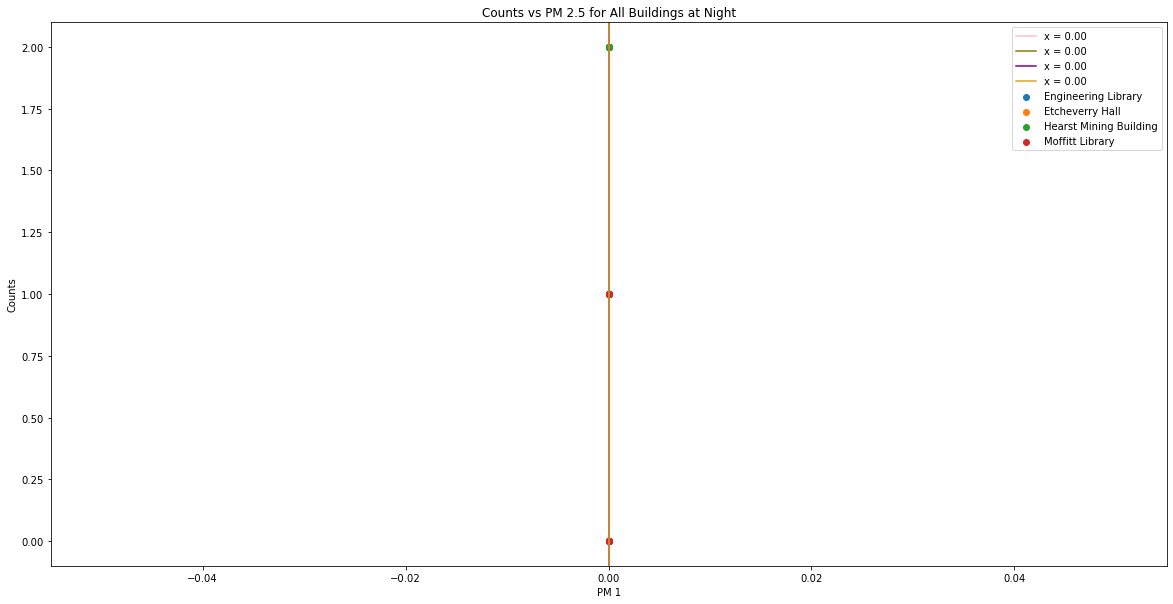

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                        13:45:04   Log-Likelihood:                -320.32
No. Observations:                 468   AIC:                             642.6
Df Residuals:                     467   BIC:                             646.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2415      0.022     10.876      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [111]:
x = []
x.extend(EngNightData["PM 2.5"])
x.extend(EtchNightData["PM 2.5"])
x.extend(HearstNightData["PM 2.5"])
x.extend(MoffittNightData["PM 2.5"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = 'x = 0.00', color = 'pink')
plt.axvline(x = 0, label = 'x = 0.00', color = 'olive')
plt.axvline(x = 0, label = 'x = 0.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["PM 2.5"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["PM 2.5"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["PM 2.5"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["PM 2.5"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 2.5 for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

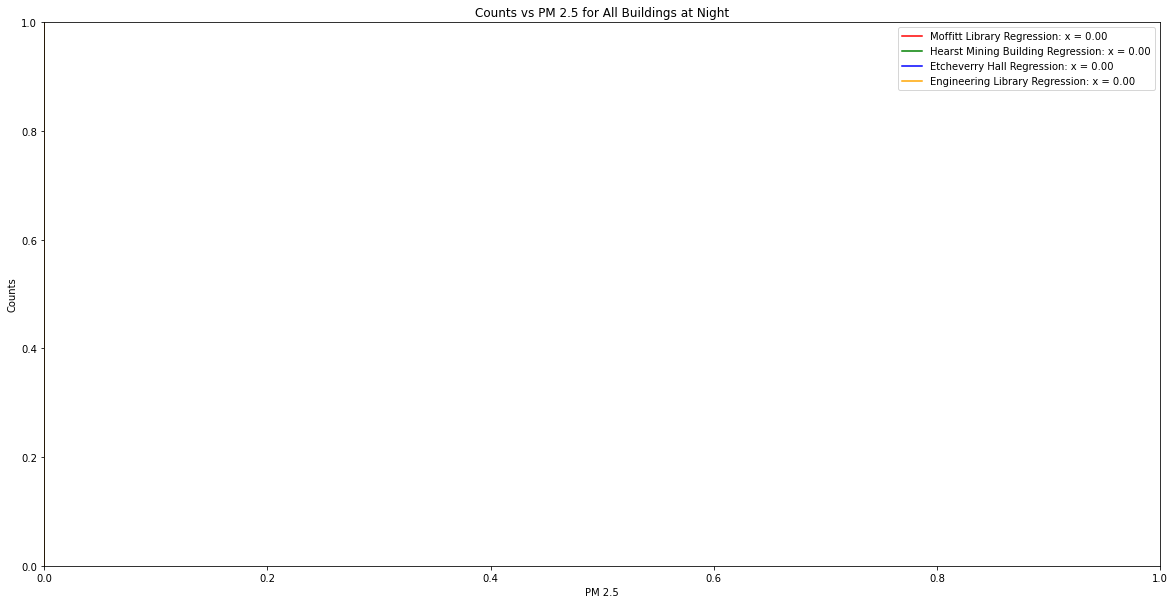

In [112]:
plt.axvline(x = 0, label = 'Moffitt Library Regression: x = 0.00', color = 'red')
plt.axvline(x = 0, label = 'Hearst Mining Building Regression: x = 0.00', color = 'green')
plt.axvline(x = 0, label = 'Etcheverry Hall Regression: x = 0.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

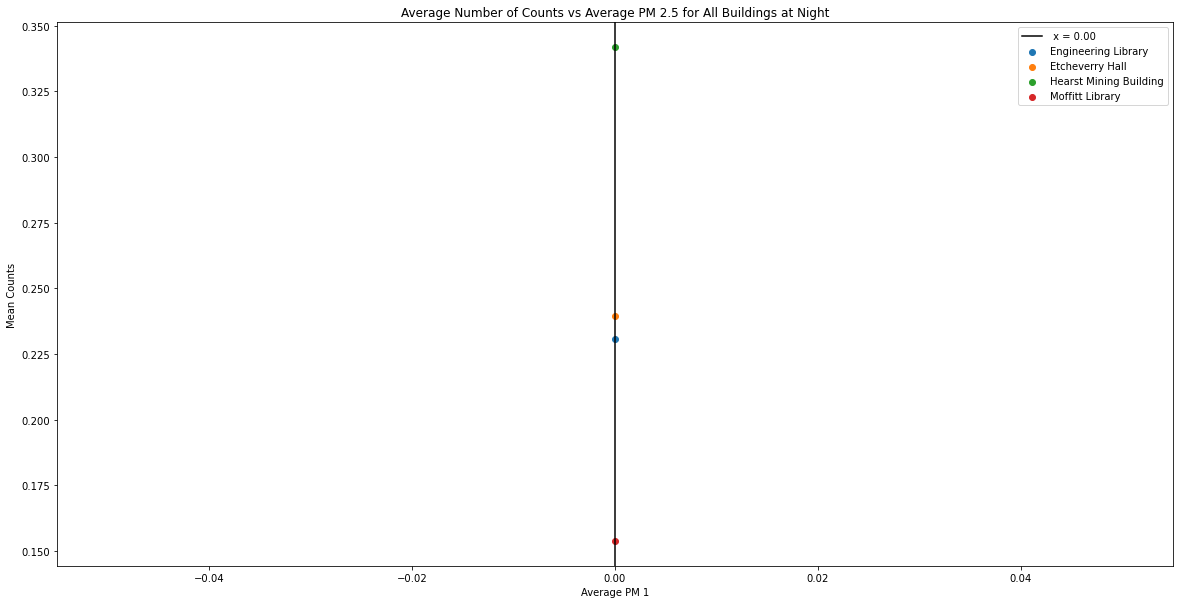

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                        13:45:04   Log-Likelihood:                 5.1451
No. Observations:                   4   AIC:                            -8.290
Df Residuals:                       3   BIC:                            -8.904
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2415      0.039      6.255      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [113]:
x = [np.mean(EngNightData["PM 2.5"]), np.mean(EtchNightData["PM 2.5"]), np.mean(HearstNightData["PM 2.5"]), np.mean(MoffittNightData["PM 2.5"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = ' x = 0.00', color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["PM 2.5"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["PM 2.5"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["PM 2.5"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["PM 2.5"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 1')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 2.5 for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

### Plot Radiation vs Air Quality (PM 10) Data for Both Noon and Night Times at Each Location

#### Engineering Library

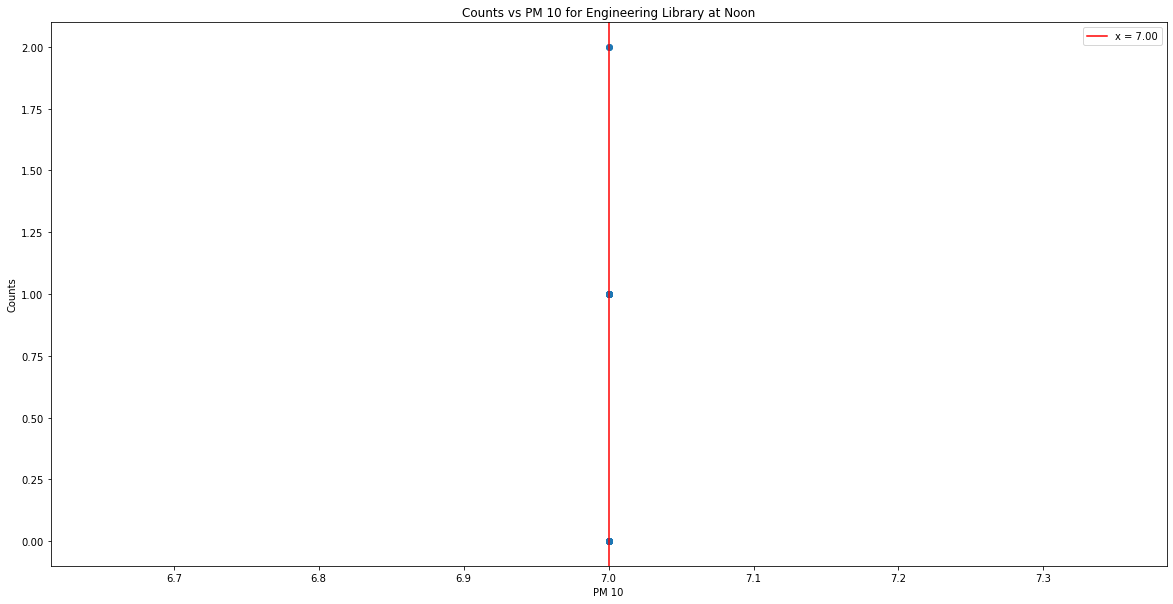

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:05   Log-Likelihood:                -73.884
No. Observations:                     117   AIC:                             149.8
Df Residuals:                         116   BIC:                             152.5
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 10       

In [114]:
x = EngNoonData["PM 10"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, 0.096*x, label = 'y=0.096x+0.000'.format(m,b), color = 'red')
plt.axvline(x = 7.0, label = 'x = 7.00', color = 'red')
plt.scatter(EngNoonData["PM 10"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

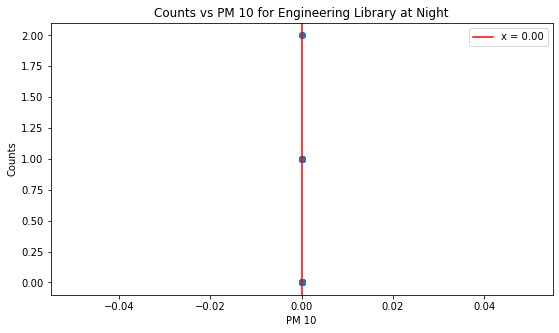

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:05   Log-Likelihood:                -75.190
No. Observations:                     117   AIC:                             152.4
Df Residuals:                         116   BIC:                             155.1
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [115]:
x = EngNightData["PM 10"]
y = EngNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EngNightData["PM 10"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')              
plt.title("Counts vs PM 10 for Engineering Library at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

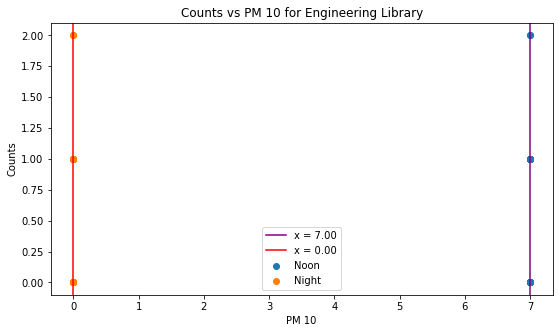

In [116]:
x = EngNoonData["PM 10"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 7.0, label = 'x = 7.00', color = 'purple')
q = EngNightData["PM 10"]
r = EngNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EngNoonData["PM 10"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["PM 10"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for Engineering Library")  
plt.rcParams['figure.figsize'] = [9,5]
plt.legend()
plt.show()

#### Etcheverry Hall

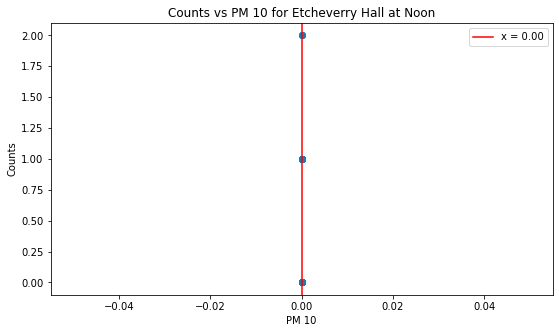

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:06   Log-Likelihood:                -78.525
No. Observations:                     117   AIC:                             159.1
Df Residuals:                         116   BIC:                             161.8
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [117]:
x = EtchNoonData["PM 10"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 10"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Etcheverry Hall at Noon")          
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

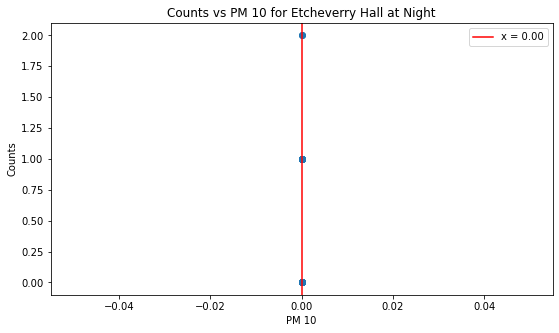

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:06   Log-Likelihood:                -76.429
No. Observations:                     117   AIC:                             154.9
Df Residuals:                         116   BIC:                             157.6
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [118]:
x = EtchNightData["PM 10"]
y = EtchNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNightData["PM 10"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')              
plt.title("Counts vs PM 10 for Etcheverry Hall at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

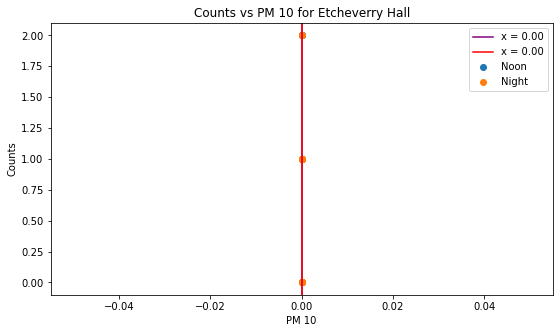

In [119]:
x = EtchNoonData["PM 10"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'purple')
q = EtchNightData["PM 10"]
r = EtchNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 10"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["PM 10"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Hearst Mining Building

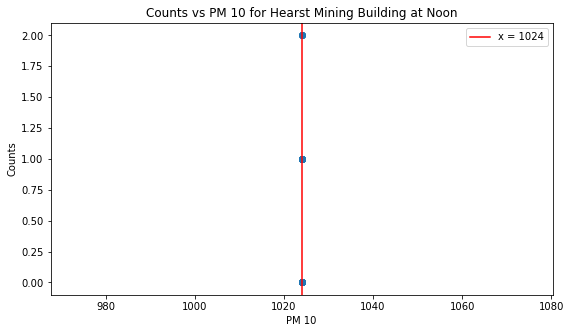

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:07   Log-Likelihood:                -80.402
No. Observations:                     117   AIC:                             162.8
Df Residuals:                         116   BIC:                             165.6
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 10       

In [120]:
x = HearstNoonData["PM 10"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 1024, label = 'x = 1024', color = 'red')
plt.scatter(HearstNoonData["PM 10"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

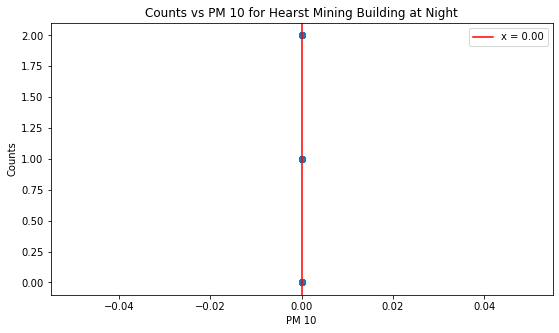

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:07   Log-Likelihood:                -103.70
No. Observations:                     117   AIC:                             209.4
Df Residuals:                         116   BIC:                             212.2
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [121]:
x = HearstNightData["PM 10"]
y = HearstNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(HearstNightData["PM 10"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

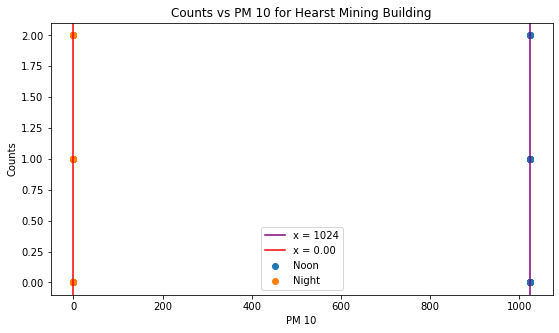

In [122]:
x = HearstNoonData["PM 10"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 1024, label = 'x = 1024', color = 'purple')
q = HearstNightData["PM 10"]
r = HearstNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(HearstNoonData["PM 10"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["PM 10"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

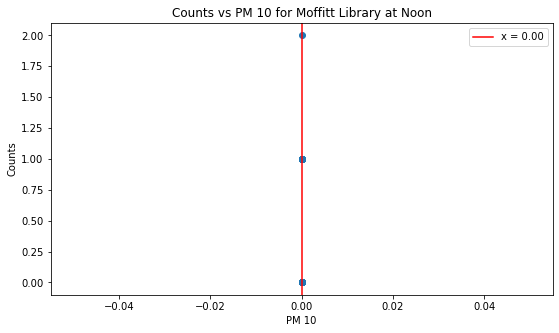

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:07   Log-Likelihood:                -64.062
No. Observations:                     117   AIC:                             130.1
Df Residuals:                         116   BIC:                             132.9
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [123]:
x = MoffittNoonData["PM 10"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = 'x = 0.00', color = 'red')
plt.scatter(MoffittNoonData["PM 10"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

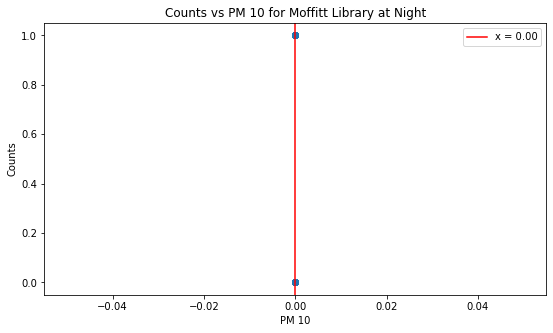

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            13:45:08   Log-Likelihood:                -46.743
No. Observations:                     117   AIC:                             95.49
Df Residuals:                         116   BIC:                             98.25
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [124]:
x = MoffittNightData["PM 10"]
y = MoffittNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(MoffittNightData["PM 10"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

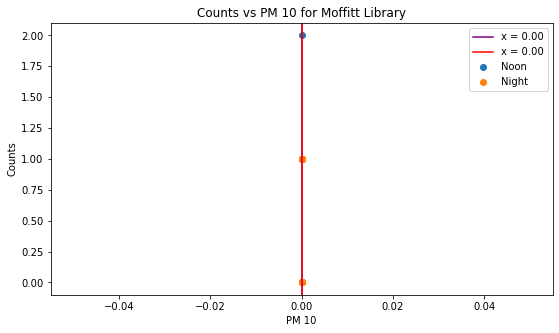

In [125]:
x = MoffittNoonData["PM 10"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'purple')
q = MoffittNightData["PM 10"]
r = MoffittNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(MoffittNoonData["PM 10"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["PM 10"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### All Buildings at Noon

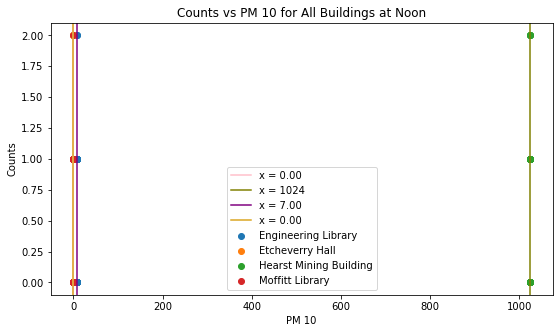

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02991
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.863
Time:                        13:45:08   Log-Likelihood:                -298.33
No. Observations:                 468   AIC:                             600.7
Df Residuals:                     466   BIC:                             609.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2137      0.025      8.707      0.0

In [126]:
x = []
x.extend(EngNoonData["PM 10"])
x.extend(EtchNoonData["PM 10"])
x.extend(HearstNoonData["PM 10"])
x.extend(MoffittNoonData["PM 10"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = 'x = 0.00', color = 'pink')
plt.axvline(x = 1024, label = 'x = 1024', color = 'olive')
plt.axvline(x = 7, label = 'x = 7.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["PM 10"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["PM 10"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["PM 10"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["PM 10"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

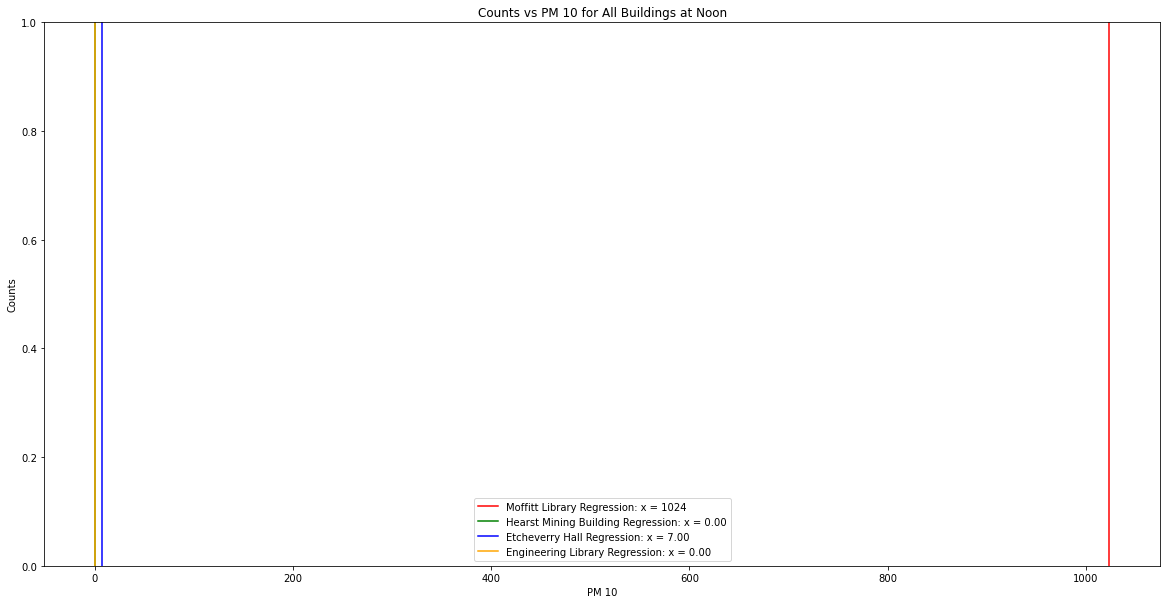

In [127]:
plt.axvline(x = 1024, label = 'Moffitt Library Regression: x = 1024', color = 'red')
plt.axvline(x = 0, label = 'Hearst Mining Building Regression: x = 0.00', color = 'green')
plt.axvline(x = 7, label = 'Etcheverry Hall Regression: x = 7.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

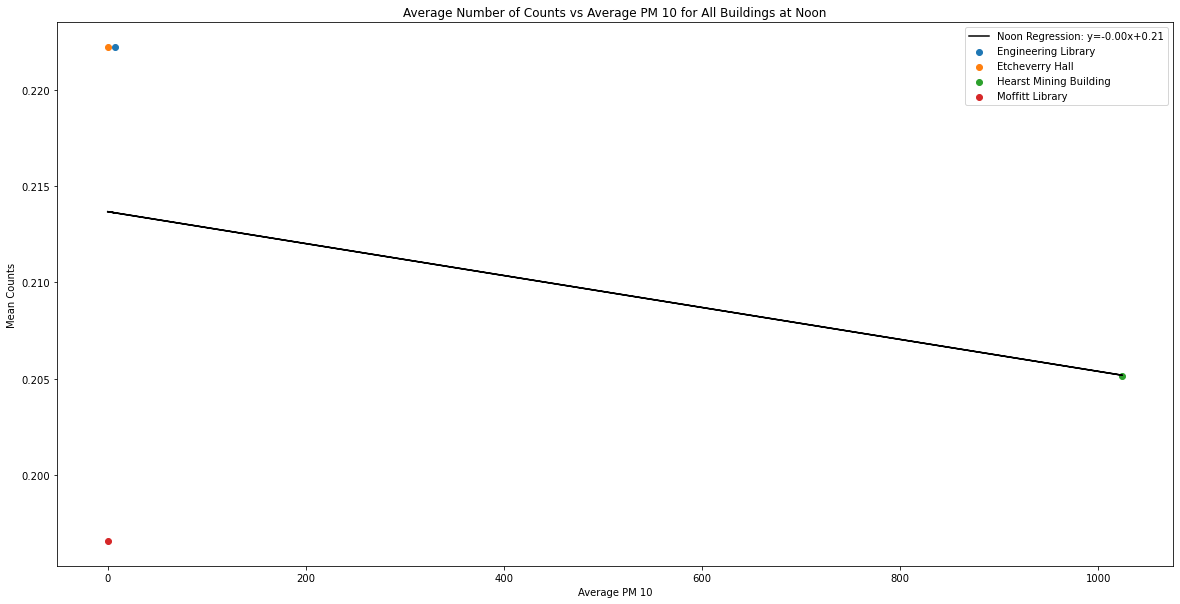

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                 -0.336
Method:                 Least Squares   F-statistic:                    0.2449
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.670
Time:                        13:45:09   Log-Likelihood:                 12.557
No. Observations:                   4   AIC:                            -21.11
Df Residuals:                       2   BIC:                            -22.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2137      0.009     24.915      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [128]:
x = [np.mean(EngNoonData["PM 10"]), np.mean(EtchNoonData["PM 10"]), np.mean(HearstNoonData["PM 10"]), np.mean(MoffittNoonData["PM 10"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["PM 10"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["PM 10"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["PM 10"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["PM 10"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 10')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 10 for All Buildings at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

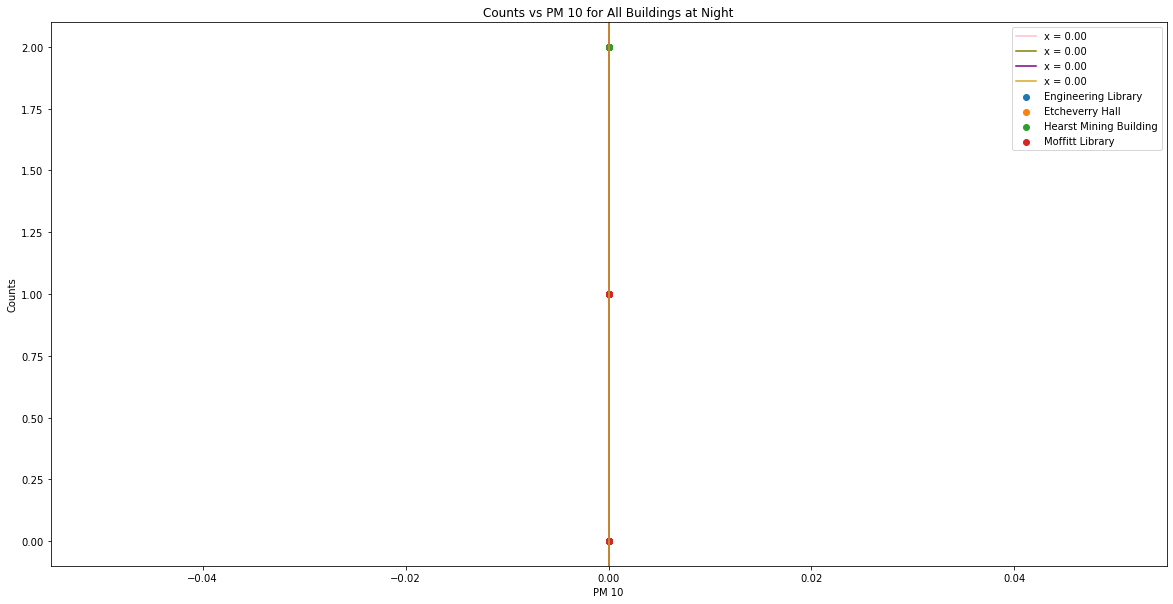

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                        13:45:10   Log-Likelihood:                -320.32
No. Observations:                 468   AIC:                             642.6
Df Residuals:                     467   BIC:                             646.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2415      0.022     10.876      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [129]:
x = []
x.extend(EngNightData["PM 10"])
x.extend(EtchNightData["PM 10"])
x.extend(HearstNightData["PM 10"])
x.extend(MoffittNightData["PM 10"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = 'x = 0.00', color = 'pink')
plt.axvline(x = 0, label = 'x = 0.00', color = 'olive')
plt.axvline(x = 0, label = 'x = 0.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["PM 10"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["PM 10"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["PM 10"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["PM 10"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

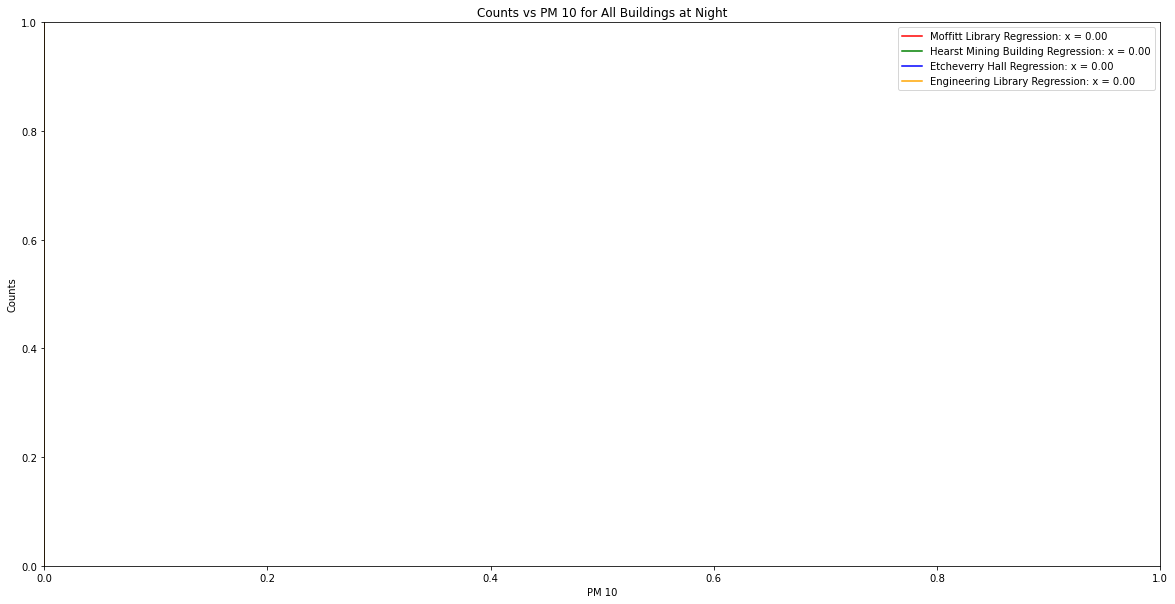

In [130]:
plt.axvline(x = 0, label = 'Moffitt Library Regression: x = 0.00', color = 'red')
plt.axvline(x = 0, label = 'Hearst Mining Building Regression: x = 0.00', color = 'green')
plt.axvline(x = 0, label = 'Etcheverry Hall Regression: x = 0.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

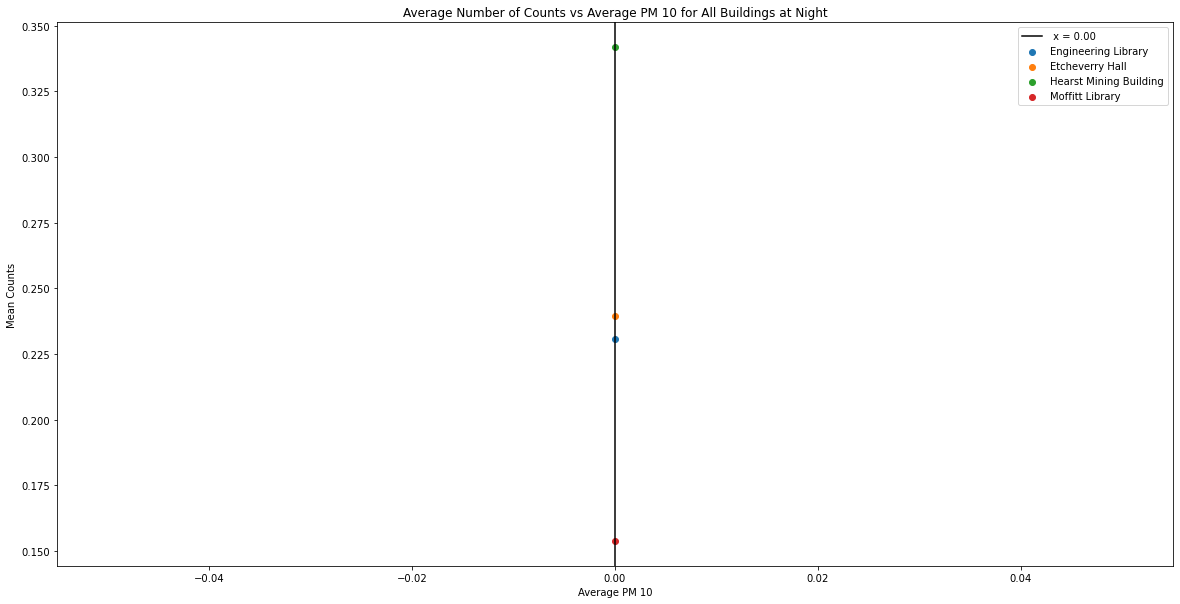

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                        13:45:10   Log-Likelihood:                 5.1451
No. Observations:                   4   AIC:                            -8.290
Df Residuals:                       3   BIC:                            -8.904
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2415      0.039      6.255      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [131]:
x = [np.mean(EngNightData["PM 10"]), np.mean(EtchNightData["PM 10"]), np.mean(HearstNightData["PM 10"]), np.mean(MoffittNightData["PM 10"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = ' x = 0.00', color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["PM 10"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["PM 10"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["PM 10"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["PM 10"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 10')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 10 for All Buildings at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())